# <h1 style='text-align: center;'> Analyzing Crime Data Using Machine Learning Model </h1>

                                                By: Ishak Ansar
***

# Abstract

Chicago is a bustling city full of energy, but it also grapples with a serious issue: crime. Gaining insights into the patterns and factors that influence crime rates is essential for creating safer communities. This study examines an extensive dataset of Chicago's crime incidents, seeking to uncover valuable information that can put up effective strategies.

In 2022 alone, over 40,000 crimes were reported in Chicago, each with significant consequences that affect individuals, families, and the city's overall well-being. This research explores various dimensions of crime in Chicago, focusing on:

* **Spatial distribution:** By identifying areas with higher crime rates, resources can be allocated more efficiently, and preventative measures can be implemented. Understanding which areas have higher crime rates can help estimate the number of residents exposed to issues such as fear, safety concerns, and property damage.

* **Temporal trends:** Analyzing crime patterns across different seasons and days of the week can help predict and address potential issues proactively. Recognizing seasonal trends and day-of-week patterns can help forecast periods with increased crime occurrences, enabling targeted interventions and potentially reducing the number of victims during those times.

* **Location-based risk factors:** Examining the relationship between specific locations and types of crime can reveal potential risk factors. Identifying associations between specific locations and crime types can highlight areas with higher risks for certain crimes, helping individuals avoid these locations or take preventive measures.


Overall, this research aims to provide a deeper understanding of crime patterns in Chicago, contributing to the development of more effective crime prevention strategies.

# Introduction To The Project

This project uses data analysis to uncover valuable insights into crime patterns throughout Chicago city. By exploring how crime varies by area, season, and even day of the week, the study aims to identify effective crime prevention strategies.

**Research Questions:**

This study will address several critical questions about crime in Chicago:

1. How does the frequency of various crime types differ across different districts in Chicago?
2. What are the most common locations for domestic-related crimes?
3. Are certain crime types more likely to lead to arrests than others?
4. How do crime rates and types change with different seasons and days of the week?
5. Can a machine learning model accurately predict the primary type of crime (e.g., theft, assault) using features?


# Data source:

The data for this project was sourced from the publicly accessible Chicago Crime dataset on <a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data" target="_blank">Chicago Data Portal</a>

Though the full dataset 8 million entries (2001 to present), the initial analysis will focus on a subset of 1.5 million rows (2018 to 2024 July) due to resource constraints. As training on the full 8 million rows would be computationally intensive. The final dataset will consist of 1,594,870 rows. 

**Data Content:**

The dataset provides information on reported crime incidents in Chicago, including various attributes for each crime record:

- **ID:** A unique identifier for each crime record.
- **Case Number:** A unique identifier for each crime incident.
- **date:** The date and time when the crime occurred.
- **block:** The block address where the crime occurred.
- **iucr:** Illinois Uniform Crime Reporting code, a numerical code that represents the crime type.
- **primary_type:** The primary classification of the crime (e.g., theft, assault, robbery).
- **description:** A detailed description of the crime.
- **location_description:** The type of location where the crime occurred (e.g., street, residence, park).
- **arrest:** Indicates whether an arrest was made for the crime (Yes/No).
- **domestic:** Indicates whether the crime was domestic-related (Yes/No).
- **beat:** The police beat where the crime occurred.
- **district:** The police district where the crime occurred.
- **ward:** The city ward where the crime occurred.
- **community_area:** The community area where the crime occurred.
- **fbi_code:** The FBI's classification for the crime.
- **x_coordinate:** The X-coordinate of the location where the crime occurred (often -in a projected coordinate system like UTM).
- **y_coordinate:** The Y-coordinate of the location where the crime occurred (often in a projected coordinate system like UTM).
- **year:** The year when the crime occurred.
- **updated_on:** The date and time when the record was last updated.
- **latitude:** The latitude coordinate of the crime location. (This location is shifted from the actual location for partial redaction but falls on the same block.)
- **longitude:** The longitude coordinate of the crime location. (This location is shifted from the actual location for partial redaction but falls on the same block.)
- **location:** A combined field of latitude and longitude, often represented as a point on a map.

# Approach:

1. **Data Acquisition and Storage:**
    
I have Downloaded the Chicago crime data from the official website in .CSV format and imported it into Jupyter Notebook.

2. **Exploratory Data Analysis (EDA):**
    
Explore the data to understand its structure, identify any anomalies, and uncover relationships between different factors. Visualization libraries like Matplotlib and Seaborn will be used to create informative charts and graphs. Additionally, we'll leverage the Folium library for geospatial analysis to:


- **Visualizing Crime Distribution:** Creating interactive maps to show the spatial distribution of various crime types across Chicago.
- **Identifying Crime Hotspots:** Applying clustering techniques to identify areas with high concentrations of specific crimes.

3. **Data Cleaning and Feature Engineering:**

Based on the EDA, we addressed data quality issues such as missing values and inconsistencies. Feature engineering techniques also be applied to enhance model performance, such as encoding categorical variables and creating new features from existing data.

4. **Model Building and Evaluation:**

Main objective is to predict the type of crime. I have build and evaluated three machine learning models for this purpose:

- **Logistic Regression:** This model will attempt to predict the primary crime type (e.g., theft, assault) based on features like date, location, and community area.
- **Random Forest:** Similar to the logistic regression model, this will also predict crime type based on features like date, location, and community area.
- **XGBoost :** This model might be explored to predict crime type using historical data on crime types and locations.

The performance of these models will be compared using metrics such as accuracy, precision, recall, and F1 score. The best-performing model will be selected for further analysis.

5. **Ensemble Model Construction:**

To potentially achieve better results, I created an ensemble model that combined the predictions of the individual models. This ensemble approach aimed to leverage the strengths of each model while compensating for their weaknesses. I used Python libraries like scikit-learn for this step and implemented **AdaBoost as the ensemble model, with Decision Trees as the weak learners.**

# Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
# Load the CSV file containing crime data from 2018 to present into a DataFrame.
df = pd.read_csv('C:/DATAIOD/Crimes_-_2018_to_Present_20240731.csv')

# Display the first few rows of the DataFrame to get a quick overview of the data.
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13539851,JH359575,07/23/2024 12:00:00 AM,043XX S ELLIS AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,"(41.815968533, -87.601835172)",1.0,4301.0,5.0,398.0,10.0,36.0,24.0,113.0,9.0
1,13539770,JH358272,07/23/2024 12:00:00 AM,003XX W GARFIELD BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,"(41.794130134, -87.634996434)",12.0,21559.0,66.0,166.0,9.0,37.0,23.0,117.0,20.0
2,13538765,JH358119,07/23/2024 12:00:00 AM,011XX S DESPLAINES ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,SIDEWALK,False,True,...,"(41.867632859, -87.643672873)",48.0,14917.0,29.0,97.0,26.0,44.0,22.0,147.0,28.0
3,13539086,JH358837,07/23/2024 12:00:00 AM,038XX S WELLS ST,0560,ASSAULT,SIMPLE,STREET,False,True,...,"(41.824266191, -87.632482389)",12.0,14924.0,35.0,296.0,9.0,37.0,23.0,170.0,8.0
4,13539910,JH359581,07/23/2024 12:00:00 AM,035XX W AINSLIE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,"(41.970191532, -87.716260008)",28.0,21849.0,14.0,750.0,20.0,20.0,1.0,48.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594865,13114627,JG310120,01/01/2018 11:59:00 PM,041XX S FEDERAL ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1594866,11192999,JB101143,01/01/2018 11:55:00 PM,132XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.65460049, -87.613148723)",30.0,4460.0,51.0,10.0,43.0,47.0,10.0,221.0,11.0
1594867,11192968,JB101131,01/01/2018 11:45:00 PM,006XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,"(41.893646656, -87.631177143)",22.0,4446.0,37.0,670.0,36.0,55.0,14.0,72.0,42.0
1594868,11192996,JB101134,01/01/2018 11:40:00 PM,105XX S WENTWORTH AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,"(41.702294054, -87.628150774)",45.0,21861.0,45.0,524.0,22.0,19.0,10.0,256.0,21.0


In [3]:
#!pip install folium

In [4]:
#!pip install xgboost

In [5]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594870 entries, 0 to 1594869
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   ID                          1594870 non-null  int64  
 1   Case Number                 1594870 non-null  object 
 2   Date                        1594870 non-null  object 
 3   Block                       1594870 non-null  object 
 4   IUCR                        1594870 non-null  object 
 5   Primary Type                1594870 non-null  object 
 6   Description                 1594870 non-null  object 
 7   Location Description        1586576 non-null  object 
 8   Arrest                      1594870 non-null  bool   
 9   Domestic                    1594870 non-null  bool   
 10  Beat                        1594870 non-null  int64  
 11  District                    1594870 non-null  int64  
 12  Ward                        1594818 non-null  float64
 1

In [6]:
# Display the column names of the DataFrame.
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-'],
      dtype='object')

In [7]:
# Get the shape of the DataFrame
df.shape

(1594870, 31)

Our dataset consists of 1594870 rows and 31 columns.

In [8]:
# Check for the presence of null values in each column.
null_values_present = df.isnull().any()
null_values_present

ID                            False
Case Number                   False
Date                          False
Block                         False
IUCR                          False
Primary Type                  False
Description                   False
Location Description           True
Arrest                        False
Domestic                      False
Beat                          False
District                      False
Ward                           True
Community Area                 True
FBI Code                      False
X Coordinate                   True
Y Coordinate                   True
Year                          False
Updated On                    False
Latitude                       True
Longitude                      True
Location                       True
Historical Wards 2003-2015     True
Zip Codes                      True
Community Areas                True
Census Tracts                  True
Wards                          True
Boundaries - ZIP Codes      

In [9]:
# Generate descriptive statistics of the DataFrame
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
count,1.594870e+06,1.594870e+06,1.594870e+06,1.594818e+06,1.594868e+06,1.571167e+06,1.571167e+06,1.594870e+06,1.571167e+06,1.571167e+06,1.565649e+06,1.571167e+06,1.566357e+06,1.566298e+06,1.566369e+06,1.566367e+06,1.566519e+06,1.566522e+06,1.566100e+06
mean,1.232319e+07,1.148829e+03,1.125914e+01,2.323895e+01,3.662683e+01,1.165140e+06,1.886546e+06,2.020781e+03,4.184427e+01,-8.766950e+01,2.766150e+01,1.895838e+04,3.852468e+01,3.784405e+02,2.595317e+01,3.197069e+01,1.493447e+01,1.479891e+02,2.304367e+01
std,9.395959e+05,7.020604e+02,7.015248e+00,1.398122e+01,2.154238e+01,1.638598e+04,3.176227e+04,1.965105e+00,8.735264e-02,5.961160e-02,1.510227e+01,5.810418e+03,1.983822e+01,2.324801e+02,1.438093e+01,1.906062e+01,6.416224e+00,7.848695e+01,1.360458e+01
min,2.376200e+04,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.018000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,2.733000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.174948e+07,6.110000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153548e+06,1.859005e+06,2.019000e+03,4.176852e+01,-8.771163e+01,1.500000e+01,2.118200e+04,2.500000e+01,1.660000e+02,1.300000e+01,1.600000e+01,1.000000e+01,8.000000e+01,1.100000e+01
50%,1.235085e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166984e+06,1.893085e+06,2.021000e+03,4.186241e+01,-8.766288e+01,2.800000e+01,2.155900e+04,3.700000e+01,3.770000e+02,2.700000e+01,3.000000e+01,1.600000e+01,1.490000e+02,2.300000e+01
75%,1.295416e+07,1.723000e+03,1.700000e+01,3.400000e+01,5.300000e+01,1.176670e+06,1.909429e+06,2.023000e+03,4.190713e+01,-8.762730e+01,4.100000e+01,2.221600e+04,5.700000e+01,5.780000e+02,3.700000e+01,5.200000e+01,2.000000e+01,2.210000e+02,3.400000e+01
max,1.354680e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.024000e+03,4.202267e+01,-8.752453e+01,5.300000e+01,2.691200e+04,7.700000e+01,8.010000e+02,5.000000e+01,6.100000e+01,2.500000e+01,2.770000e+02,5.000000e+01


In [10]:
# Drop specific columns that are not needed for the analysis.
df.drop(columns=['Historical Wards 2003-2015','Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes','Police Districts','Police Beats','Wards 2023-'], inplace=True)

In [11]:
# Display the first few rows of the DataFrame after dropping the specified columns.
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13539851,JH359575,07/23/2024 12:00:00 AM,043XX S ELLIS AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,4.0,39.0,07,1183653.0,1876378.0,2024,07/30/2024 03:41:21 PM,41.815969,-87.601835,"(41.815968533, -87.601835172)"
1,13539770,JH358272,07/23/2024 12:00:00 AM,003XX W GARFIELD BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,20.0,68.0,06,1174678.0,1868345.0,2024,07/30/2024 03:41:21 PM,41.794130,-87.634996,"(41.794130134, -87.634996434)"
2,13538765,JH358119,07/23/2024 12:00:00 AM,011XX S DESPLAINES ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,SIDEWALK,False,True,...,28.0,28.0,04B,1172097.0,1895110.0,2024,07/30/2024 03:41:21 PM,41.867633,-87.643673,"(41.867632859, -87.643672873)"
3,13539086,JH358837,07/23/2024 12:00:00 AM,038XX S WELLS ST,0560,ASSAULT,SIMPLE,STREET,False,True,...,3.0,34.0,08A,1175274.0,1879332.0,2024,07/30/2024 03:41:21 PM,41.824266,-87.632482,"(41.824266191, -87.632482389)"
4,13539910,JH359581,07/23/2024 12:00:00 AM,035XX W AINSLIE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,33.0,14.0,14,1152057.0,1932332.0,2024,07/30/2024 03:41:21 PM,41.970192,-87.716260,"(41.970191532, -87.716260008)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594870 entries, 0 to 1594869
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1594870 non-null  int64  
 1   Case Number           1594870 non-null  object 
 2   Date                  1594870 non-null  object 
 3   Block                 1594870 non-null  object 
 4   IUCR                  1594870 non-null  object 
 5   Primary Type          1594870 non-null  object 
 6   Description           1594870 non-null  object 
 7   Location Description  1586576 non-null  object 
 8   Arrest                1594870 non-null  bool   
 9   Domestic              1594870 non-null  bool   
 10  Beat                  1594870 non-null  int64  
 11  District              1594870 non-null  int64  
 12  Ward                  1594818 non-null  float64
 13  Community Area        1594868 non-null  float64
 14  FBI Code              1594870 non-

In [13]:
# Convert the 'Date' column to datetime format, specifying the date and time format.
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [14]:
# Create a copy of the DataFrame for analysis, named chicago_crime_df.
chicago_crime_df = df.copy()
chicago_crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13539851,JH359575,2024-07-23 00:00:00,043XX S ELLIS AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,4.0,39.0,07,1183653.0,1876378.0,2024,07/30/2024 03:41:21 PM,41.815969,-87.601835,"(41.815968533, -87.601835172)"
1,13539770,JH358272,2024-07-23 00:00:00,003XX W GARFIELD BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,20.0,68.0,06,1174678.0,1868345.0,2024,07/30/2024 03:41:21 PM,41.794130,-87.634996,"(41.794130134, -87.634996434)"
2,13538765,JH358119,2024-07-23 00:00:00,011XX S DESPLAINES ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,SIDEWALK,False,True,...,28.0,28.0,04B,1172097.0,1895110.0,2024,07/30/2024 03:41:21 PM,41.867633,-87.643673,"(41.867632859, -87.643672873)"
3,13539086,JH358837,2024-07-23 00:00:00,038XX S WELLS ST,0560,ASSAULT,SIMPLE,STREET,False,True,...,3.0,34.0,08A,1175274.0,1879332.0,2024,07/30/2024 03:41:21 PM,41.824266,-87.632482,"(41.824266191, -87.632482389)"
4,13539910,JH359581,2024-07-23 00:00:00,035XX W AINSLIE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,33.0,14.0,14,1152057.0,1932332.0,2024,07/30/2024 03:41:21 PM,41.970192,-87.716260,"(41.970191532, -87.716260008)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594865,13114627,JG310120,2018-01-01 23:59:00,041XX S FEDERAL ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,3.0,38.0,02,NaN,NaN,2018,06/22/2023 03:51:35 PM,NaN,NaN,NaN
1594866,11192999,JB101143,2018-01-01 23:55:00,132XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,9.0,54.0,08B,1181061.0,1817551.0,2018,05/04/2018 03:51:04 PM,41.654600,-87.613149,"(41.65460049, -87.613148723)"
1594867,11192968,JB101131,2018-01-01 23:45:00,006XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,42.0,8.0,06,1175423.0,1904617.0,2018,05/04/2018 03:51:04 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
1594868,11192996,JB101134,2018-01-01 23:40:00,105XX S WENTWORTH AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,34.0,49.0,08B,1176819.0,1834896.0,2018,05/04/2018 03:51:04 PM,41.702294,-87.628151,"(41.702294054, -87.628150774)"


In [15]:
# Filter out rows with dates earlier than January 1, 2024.
chicago_crime_df = chicago_crime_df[chicago_crime_df['Date']<'01-01-2024']

In [16]:
# Extract only the date part from each datetime string
# Format the 'Date' column to a string format 'MM/DD/YYYY'
chicago_crime_df['Date'] = chicago_crime_df['Date'].dt.strftime('%m/%d/%Y')


# Print the 'Date' column to check the formatting.
print(chicago_crime_df['Date'])

141801     12/31/2023
141802     12/31/2023
141803     12/31/2023
141804     12/31/2023
141805     12/31/2023
              ...    
1594865    01/01/2018
1594866    01/01/2018
1594867    01/01/2018
1594868    01/01/2018
1594869    01/01/2018
Name: Date, Length: 1453069, dtype: object


C:\Users\aisha\AppData\Local\Temp\ipykernel_28316\732573501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_crime_df['Date'] = chicago_crime_df['Date'].dt.strftime('%m/%d/%Y')


In [17]:
# Set the index of the DataFrame to be the 'Date' column (converted to a DatetimeIndex)
chicago_crime_df.index = pd.DatetimeIndex(chicago_crime_df['Date'])

In [18]:
#Extract Year, Month, Day, Hour, and Minutes

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day, Hour, Minute, and Weekday
df['Date_year'] = df['Date'].map(lambda x:x.year)
df['Date_month'] = df['Date'].map(lambda x:x.month)
df['Date_day'] = df['Date'].map(lambda x:x.day)
df['Date_hour'] = df['Date'].map(lambda x:x.hour)
df['Date_minute'] = df['Date'].map(lambda x:x.minute)
df['Date_weekday'] = df['Date'].map(lambda x:x.dayofweek)

print(df.head())

         ID Case Number       Date                  Block  IUCR  \
0  13539851    JH359575 2024-07-23      043XX S ELLIS AVE  0920   
1  13539770    JH358272 2024-07-23  003XX W GARFIELD BLVD  0820   
2  13538765    JH358119 2024-07-23  011XX S DESPLAINES ST  0497   
3  13539086    JH358837 2024-07-23       038XX S WELLS ST  0560   
4  13539910    JH359581 2024-07-23     035XX W AINSLIE ST  1320   

          Primary Type                                        Description  \
0  MOTOR VEHICLE THEFT                               ATTEMPT - AUTOMOBILE   
1                THEFT                                     $500 AND UNDER   
2              BATTERY  AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...   
3              ASSAULT                                             SIMPLE   
4      CRIMINAL DAMAGE                                         TO VEHICLE   

     Location Description  Arrest  Domestic  ...              Updated On  \
0                  STREET   False     False  ...  07/30/20

In [19]:
# Identify the top 10 most frequent 'Primary Type' categories in the dataset.
top_10_primary_types = df['Primary Type'].value_counts().head(10).index
top_10_primary_types

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'ROBBERY', 'BURGLARY',
       'NARCOTICS'],
      dtype='object', name='Primary Type')

In [20]:
# Create a boolean mask indicating whether each row's primary type is in the top 10 list
mask = df['Primary Type'].isin(top_10_primary_types)

# Apply the mask to filter out rows corresponding to the top 10 primary types
top_10_crime_dataset = df[mask]

# Display the filtered DataFrame
top_10_crime_dataset

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_weekday
0,13539851,JH359575,2024-07-23 00:00:00,043XX S ELLIS AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,07/30/2024 03:41:21 PM,41.815969,-87.601835,"(41.815968533, -87.601835172)",2024,7,23,0,0,1
1,13539770,JH358272,2024-07-23 00:00:00,003XX W GARFIELD BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,07/30/2024 03:41:21 PM,41.794130,-87.634996,"(41.794130134, -87.634996434)",2024,7,23,0,0,1
2,13538765,JH358119,2024-07-23 00:00:00,011XX S DESPLAINES ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,SIDEWALK,False,True,...,07/30/2024 03:41:21 PM,41.867633,-87.643673,"(41.867632859, -87.643672873)",2024,7,23,0,0,1
3,13539086,JH358837,2024-07-23 00:00:00,038XX S WELLS ST,0560,ASSAULT,SIMPLE,STREET,False,True,...,07/30/2024 03:41:21 PM,41.824266,-87.632482,"(41.824266191, -87.632482389)",2024,7,23,0,0,1
4,13539910,JH359581,2024-07-23 00:00:00,035XX W AINSLIE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,07/30/2024 03:41:21 PM,41.970192,-87.716260,"(41.970191532, -87.716260008)",2024,7,23,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,12631226,JF160669,2018-01-02 00:00:00,017XX W 84TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,03/02/2022 03:43:39 PM,NaN,NaN,NaN,2018,1,2,0,0,1
1594866,11192999,JB101143,2018-01-01 23:55:00,132XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,05/04/2018 03:51:04 PM,41.654600,-87.613149,"(41.65460049, -87.613148723)",2018,1,1,23,55,0
1594867,11192968,JB101131,2018-01-01 23:45:00,006XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,05/04/2018 03:51:04 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)",2018,1,1,23,45,0
1594868,11192996,JB101134,2018-01-01 23:40:00,105XX S WENTWORTH AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,05/04/2018 03:51:04 PM,41.702294,-87.628151,"(41.702294054, -87.628150774)",2018,1,1,23,40,0


In [21]:
# Create a copy of the filtered DataFrame for further analysis.
df = top_10_crime_dataset.copy()

# Exploratory Data Analysis

### Univariate Analysis

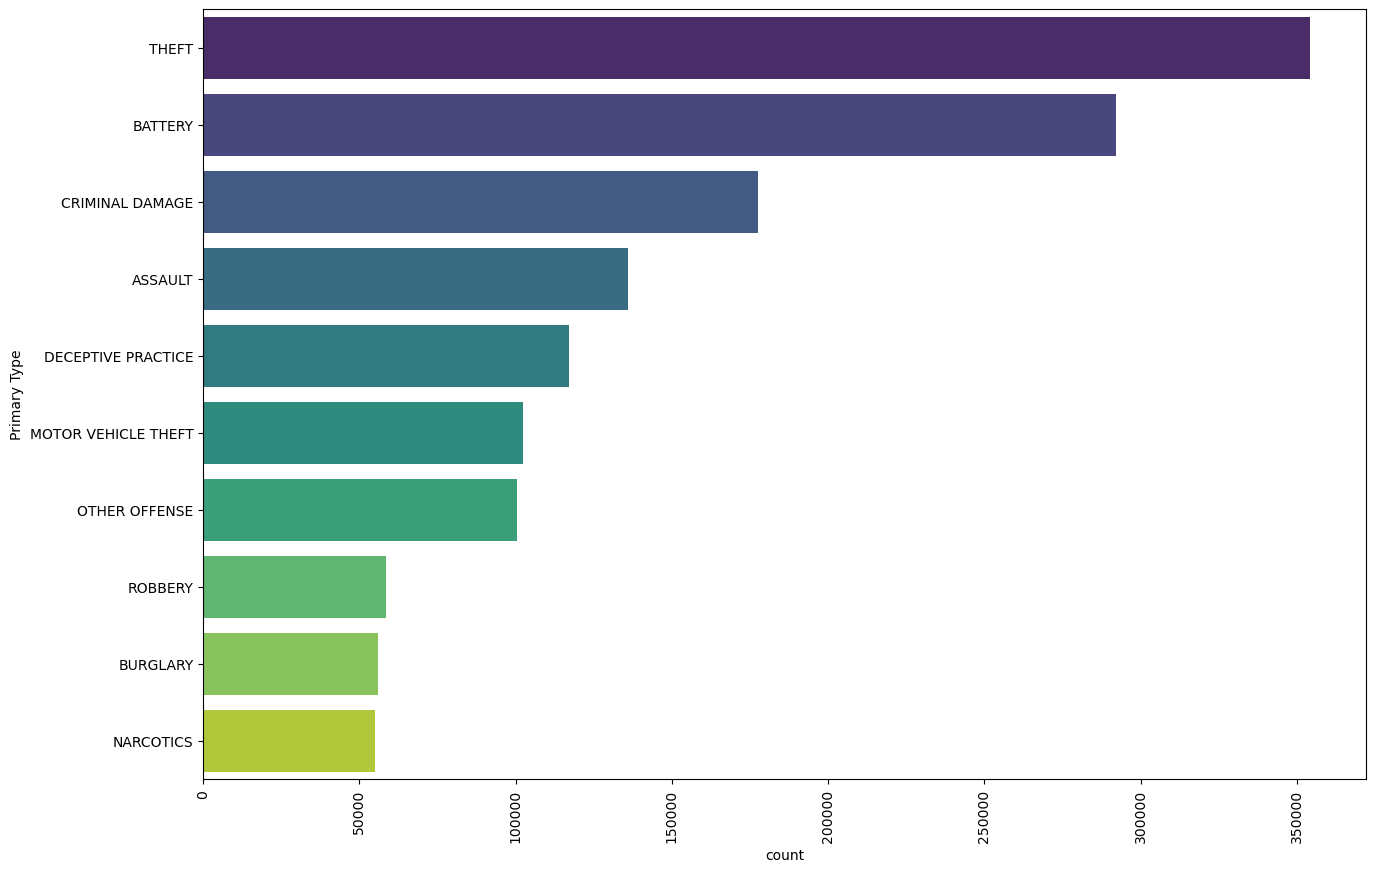

In [22]:
#Analysis of Primary Type
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = df, palette='viridis', order = df['Primary Type'].value_counts().index)
plt.xticks( rotation=90)
plt.show()

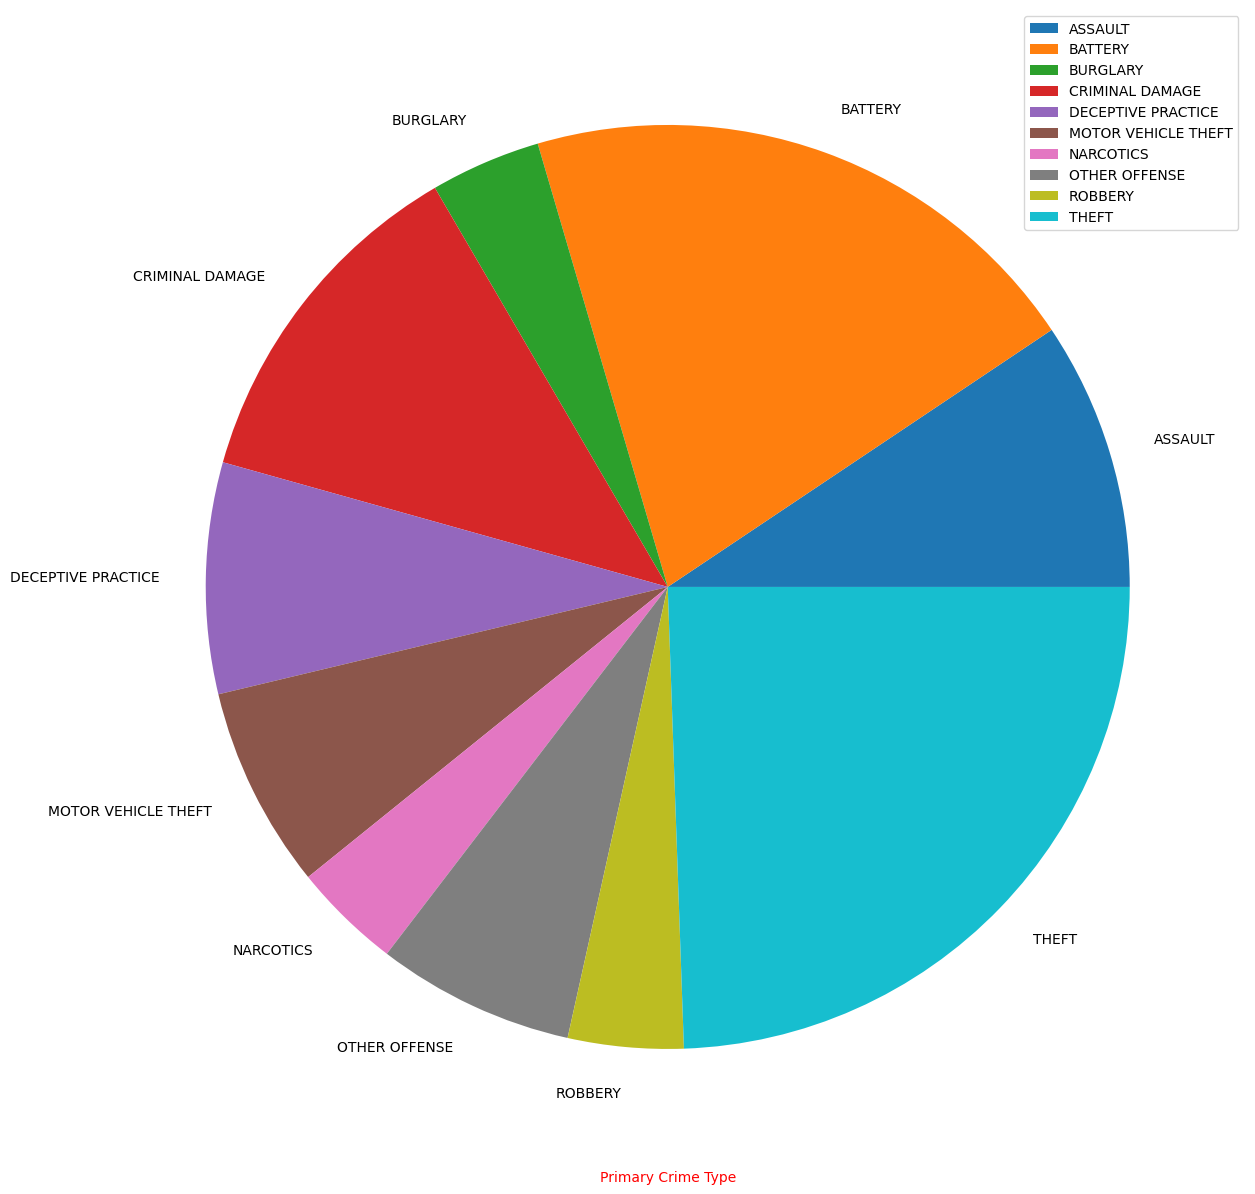

In [23]:
primaryVisualizeDF = df.groupby('Primary Type').size()

primaryVisualizeDF.plot.pie(figsize = (15,15))
plt.xlabel('Primary Crime Type', fontsize=10, color = 'red')
plt.legend()

The most common type of crime appears to be theft, followed by battery and criminal damage. The least common types of crime reported are narcotics violations and burglary.

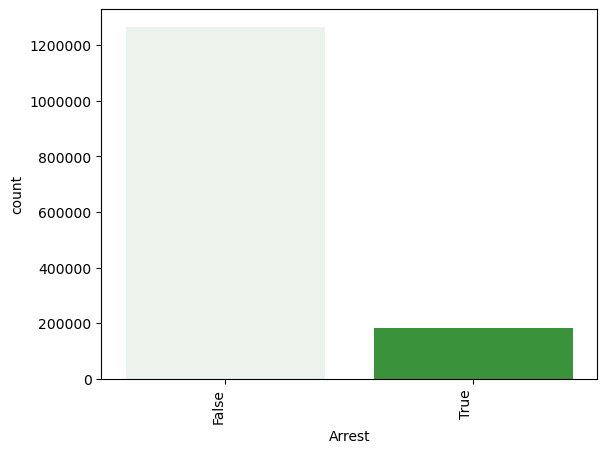

In [24]:
# Plotting the count of arrests
sns.countplot(x="Arrest", data=df, palette='light:#2ca02c')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Set the y-axis formatter to use standard numeric format
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Optionally, remove scientific notation for the y-axis
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()

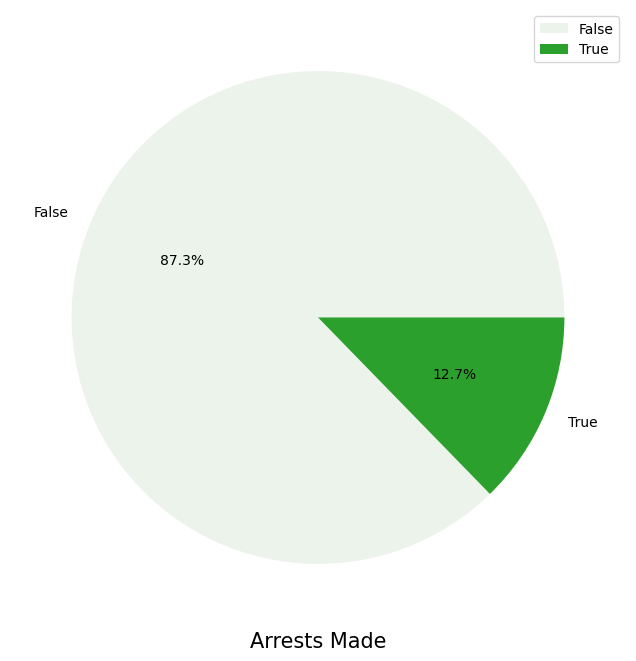

In [25]:
# Grouping data by 'Arrest' and getting the size of each group
primaryVisualizeDF = df.groupby('Arrest').size()

# Generate the color palette
colors = sns.color_palette('light:#2ca02c', len(primaryVisualizeDF))

# Plotting the pie chart with percentages and custom colors
primaryVisualizeDF.plot.pie(figsize=(8, 8), autopct='%1.1f%%', colors=colors)

# Adding label for the pie chart
plt.xlabel('Arrests Made', fontsize=15, color='Black')

# Adding legend
plt.legend()


The plot shows whether the arrest was made for a warrant or not. There were significantly less arrests made for outstanding warrants than there were for people who were not arrested . According to the y-axis, there were roughly 200,000 arrests made for warrants and close to 1,300,000 arrests of people who were not arrested.

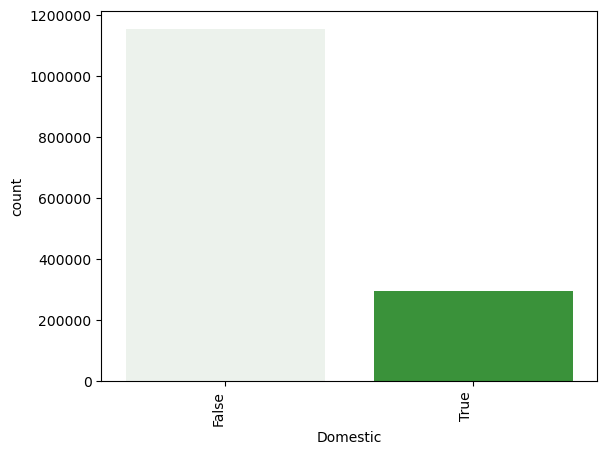

In [26]:
# Plotting the count of domestic crimes
sns.countplot(x="Domestic", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')

# Set the y-axis formatter to use standard numeric format
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()

The bar plot shows the number of crimes categorized as domestic or non-domestic. It appears that there were more non-domestic crimes than domestic crimes.

## Beat

Beat : Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district.

In [27]:
# Identify the top 10 most frequent 'Beat'
beats_series = df['Beat'].value_counts()
top_10_beats = beats_series.nlargest(10)
top_10_beats

Beat
1834    17106
421     11976
1831    11197
624     10735
511     10647
123     10541
111     10332
631      9980
423      9963
1112     9856
Name: count, dtype: int64

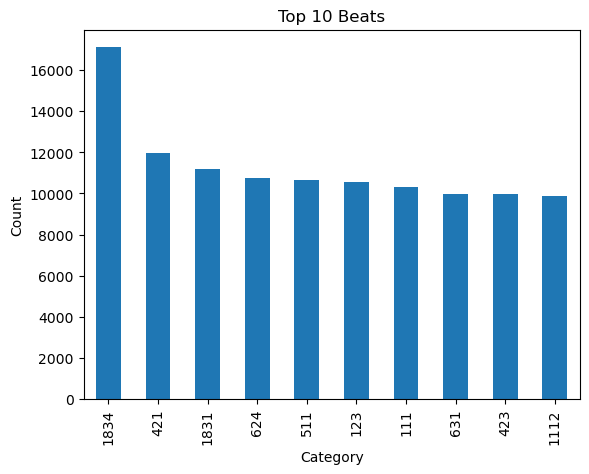

In [28]:
# Plotting the top 10 beats
top_10_beats.plot(kind='bar')
plt.xlabel("Category") 
plt.ylabel("Count")   
plt.title("Top 10 Beats") 
plt.show()

The bar chart depicts the ten most frequent police beats, likely representing areas with a higher volume of police activity. This chart reveals that Beat 1834 has the highest number of occurrences, followed by Beat 421 and Beat 1831. This suggests that law enforcement officers were dispatched to these areas more frequently than others.

## District


Indicates the police district where the incident occurred.

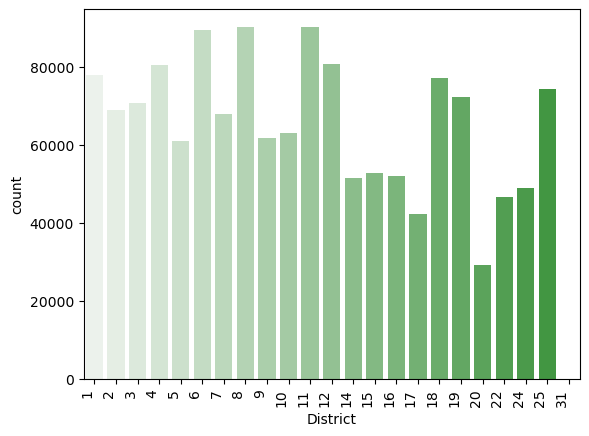

In [29]:
# Plotting the count of crimes by district
sns.countplot(x="District", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')
plt.show()

This bar plot depicts the distribution of data points across different different police districts. District 8 has the highest count, followed by District 11 and District 6.

## Ward

The ward (City Council district) where the incident occurred.

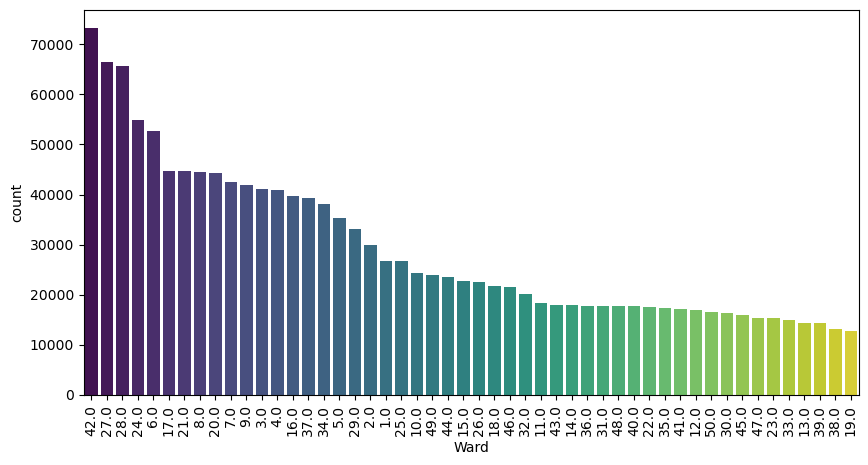

In [30]:
# Sort the community areas by count
sorted_areas = df['Ward'].value_counts().index

# Create the countplot with sorted categories and wider figure
plt.figure(figsize=(10, 5))  # Adjust the figure size
sns.countplot(x="Ward", data=df, order=sorted_areas, palette='viridis')
plt.xticks(rotation=90)
plt.show()

The plot shows the count distribution of the different police wards . Most of the crimes occur in the ward 42 followed by 27 and 28 . Least of the crimes occur in the ward 19.

## FBI Code

Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).

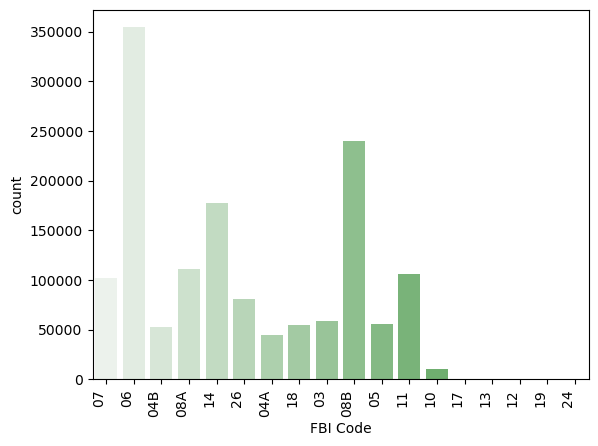

In [31]:
# Plotting the count of crimes by FBI code
sns.countplot(x="FBI Code", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')
plt.show()

The most crimes occur for FBI Code 06 followed by the FBI Code 08B . The least crimes occur for the FBI Codes 12, 13 , 17 , 19 ,24.

# Crime by Year

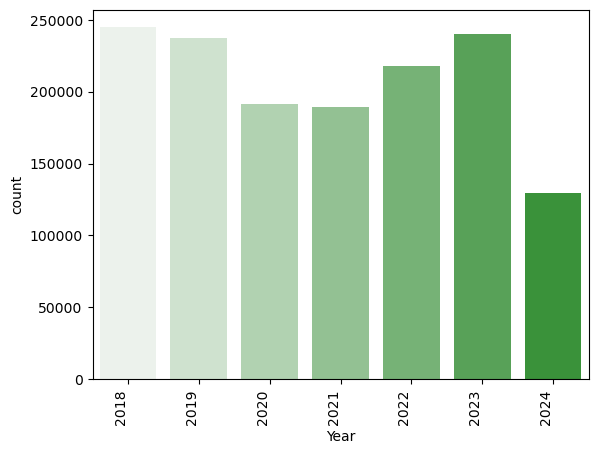

In [32]:
# Plotting the count of crimes by year
sns.countplot(x="Year", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')
plt.show()

This data suggests a trend of initially decreasing crime rates followed by a recent uptick. Here's a breakdown:


 - 2018-2019 & 2019-2020: Crime rates saw a consistent decline, with a potentially larger decrease in the second year. This suggests a positive trend towards crime reduction.
 - 2020-2021: The decrease in crime rates continued, though at a much slower pace compared to previous years.
 - 2021-2022 & 2022-2023: Both these years show a moderate increase in crime rates. This shift away from the downward trend warrants further investigation.
 
 
This data shows a promising decline in crime rates in 2020 and 2021, which could be linked to factors like reduced opportunity due to lockdowns during the COVID-19 pandemic. However, the slowdown in improvement in 2021 and the moderate increase in 2023 suggest a possible rebound as restrictions eased and social and economic disruptions from the pandemic unfolded.

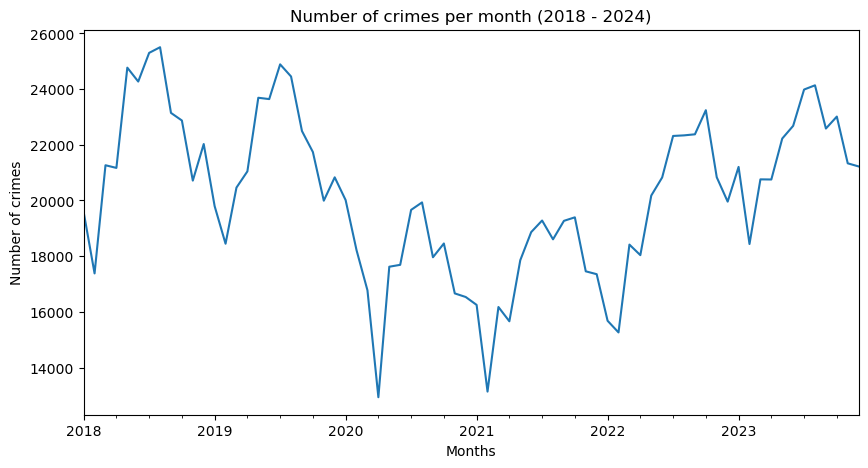

In [33]:
plt.figure(figsize=(10,5))
chicago_crime_df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2018 - 2024)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

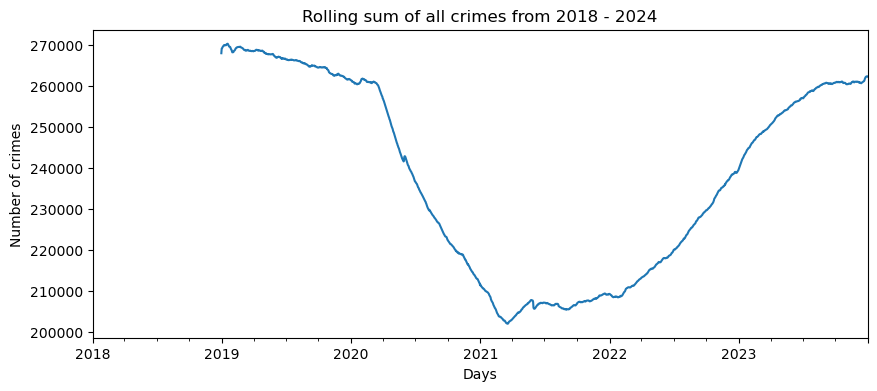

In [34]:
plt.figure(figsize=(10,4))
chicago_crime_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2018 - 2024')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

# Crime by Month

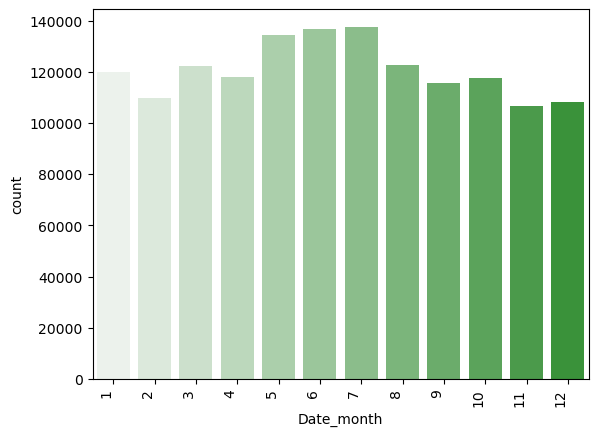

In [35]:
# Plotting the count of crimes by month
sns.countplot(x="Date_month", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')
plt.show()

This graph depicts a possible seasonal pattern in crime rates over a year. Here's what we can observe:

Higher Crimes in Summer: The graph shows a potential peak in crime rates during the summer months ( May, June, July). This could be due to a number of factors, such as warmer weather leading to more people being outdoors, or increased vacation times. Lower Crimes in Winter: Conversely, the graph suggests crime rates might be lower in the winter months ( February , March). This could be because people tend to stay indoors more during colder weather.

Although we see high crime rates for the month January (This could be a reason because of New Years) 

# Crime by Weekday

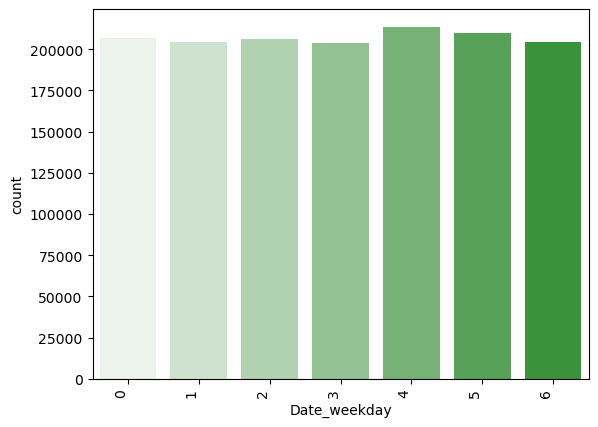

In [36]:
# Plotting the count of crimes by day of the week
sns.countplot(x="Date_weekday", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')
plt.show()

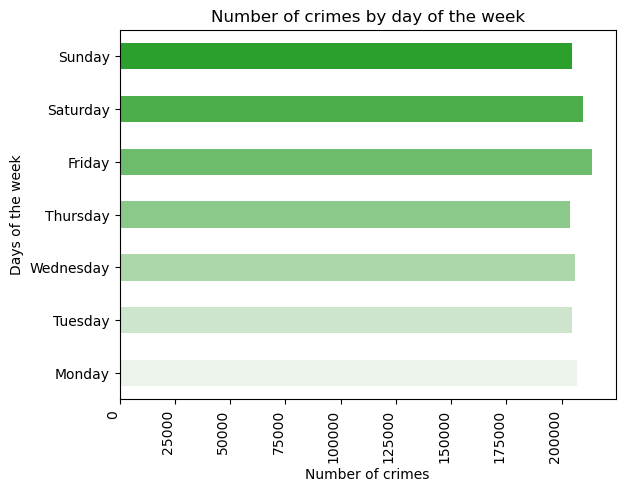

In [37]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.Date_weekday]).size().plot(kind='barh', color=sns.color_palette('light:#2ca02c', n_colors=len(days)))
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')

plt.xticks(rotation=90, ha='right')
plt.show()

There are higher crimes occuring on Friday and weekends

# Crime by Hour

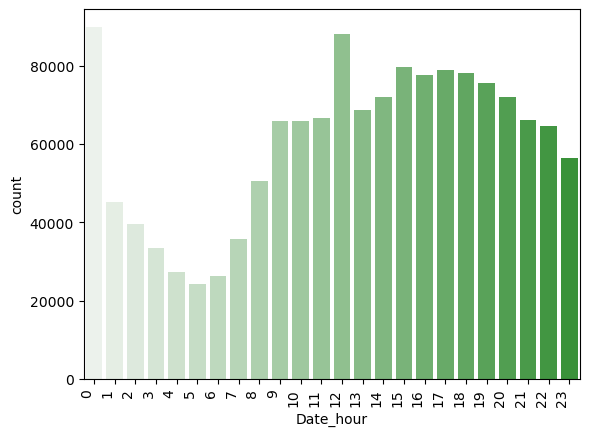

In [38]:
# Plotting the count of crimes by hour of the day
sns.countplot(x="Date_hour", data=df, palette='light:#2ca02c')
plt.xticks( rotation=90, ha='right')
plt.show()

As we can see there are high crime rates at the Noon and Midnight

# Count of top 5 crime types happened in all the years

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


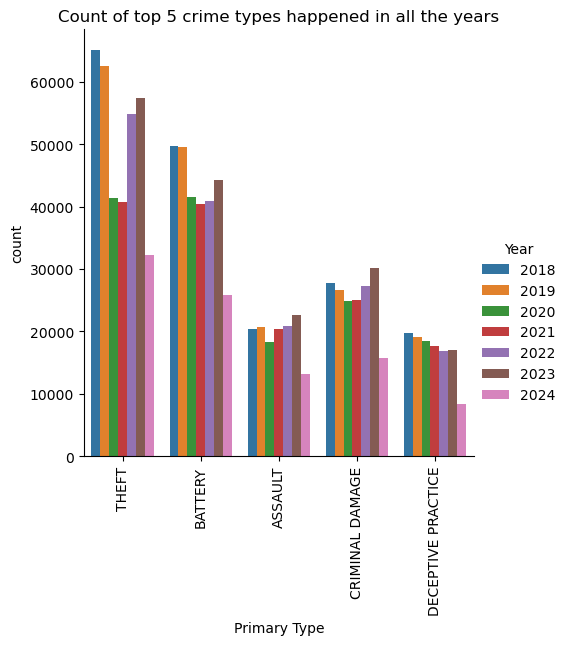

In [39]:
# Count of top 5 crime types happened in all the years
top_5_primary_types = df['Primary Type'].value_counts().head(5).index
df_top_5 = df[df['Primary Type'].isin(top_5_primary_types)]

# Plotting the count of top 5 crime types by year
sns.catplot(x='Primary Type', hue='Year', kind='count', data=df_top_5)
# plt.yscale('log')
plt.title('Count of top 5 crime types happened in all the years')
plt.xticks( rotation=90)
plt.show()

This catplot depicts trends in crime rates for various primary crime types across several years. 

Deceptive practices seem to have potentially decreased over the years. Battery rates might have seen a slight decrease followed by a increase in recent years. The same trend is followed by Theft , Criminal Damage and Assault

# Arrest By Crime Location

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


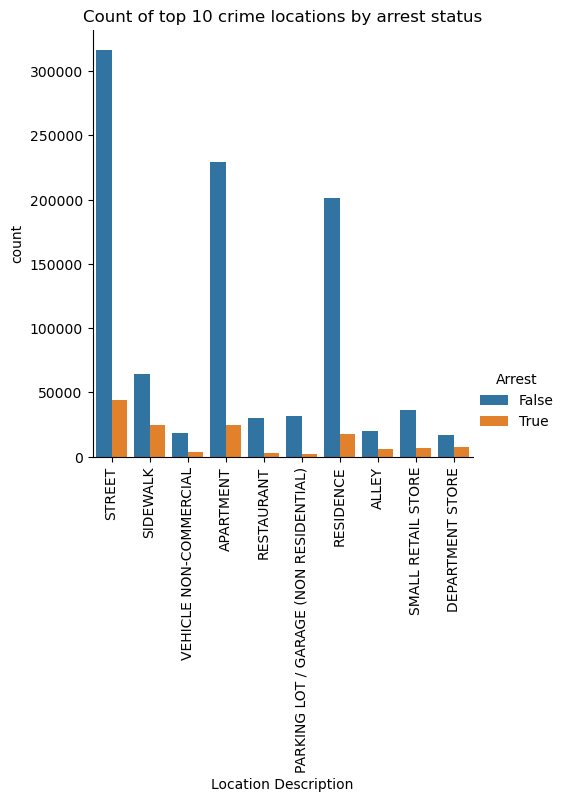

In [40]:
# Arrest by crime location
top_10_locations = df['Location Description'].value_counts().head(10).index
df_top_10 = df[df['Location Description'].isin(top_10_locations)]

# Plotting the count of top 10 crime locations by arrest status
sns.catplot(x='Location Description', hue='Arrest', kind='count', data=df_top_10)
# plt.yscale('log')
plt.title('Count of top 10 crime locations by arrest status')
plt.xticks( rotation=90)

plt.show()

Most Frequent Crimes: The locations with the highest overall crime counts are STREET, RESIDENCE, and APARTMENT.

Arrest Rates by Location: It appears that arrest rates vary depending on the location of the crime. For instance, a higher proportion of crimes might result in arrests for locations like DEPARTMENT STORE or SIDEWALK compared to places like RESIDENCE or STREET.

# Arrest By Crime Type

In [41]:
# Function to create stacked bar plot of arrests by a specified column
def stacked_barplot(data, col):
    if data[col].dtype == 'object':
        # Data preparation
        plot_df = data[['Arrest', col]].dropna()
        
        # Creating a crosstab for the counts
        count_table = pd.crosstab(plot_df[col], plot_df['Arrest'])
        
        # Plotting
        count_table.plot(kind='bar', stacked=True, figsize=(10, 7))
        plt.title(f'Stacked Bar Plot of Arrests by {col}')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.legend(title='Arrest')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

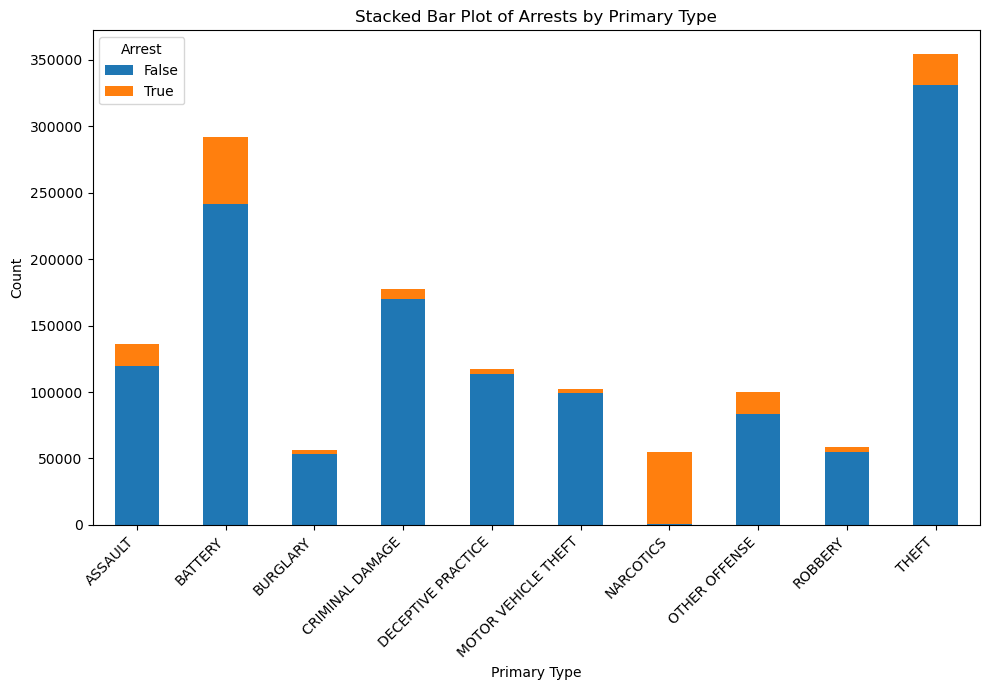

In [42]:
# Create stacked bar plot of arrests by primary type
stacked_barplot(df, 'Primary Type')

Most arrests were made for Narcotics and Battery. However, the graphs reveal that arrests were less common for theft, battery and criminal damage cases.

# Arrest By Crime Loctaion Type

In [43]:
# Function to create horizontal bar plots for arrests and non-arrests
def fn_barplot(data, col):
    if data[col].dtype in ['object']:
        fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15, 20))
        
        plot_df = df[['Arrest', col]].dropna()
        df_1 = plot_df.loc[plot_df['Arrest']==True]
        df_2 = plot_df.loc[plot_df['Arrest']==False]
        
        df_1.groupby(col)[col].count().nlargest(10).plot(kind='barh', ax=ax1, title='Arrest: ' + col)
        df_2.groupby(col)[col].count().nlargest(10).plot(kind='barh', ax=ax2, title='No Arrest: ' + col)
        
        plt.show()

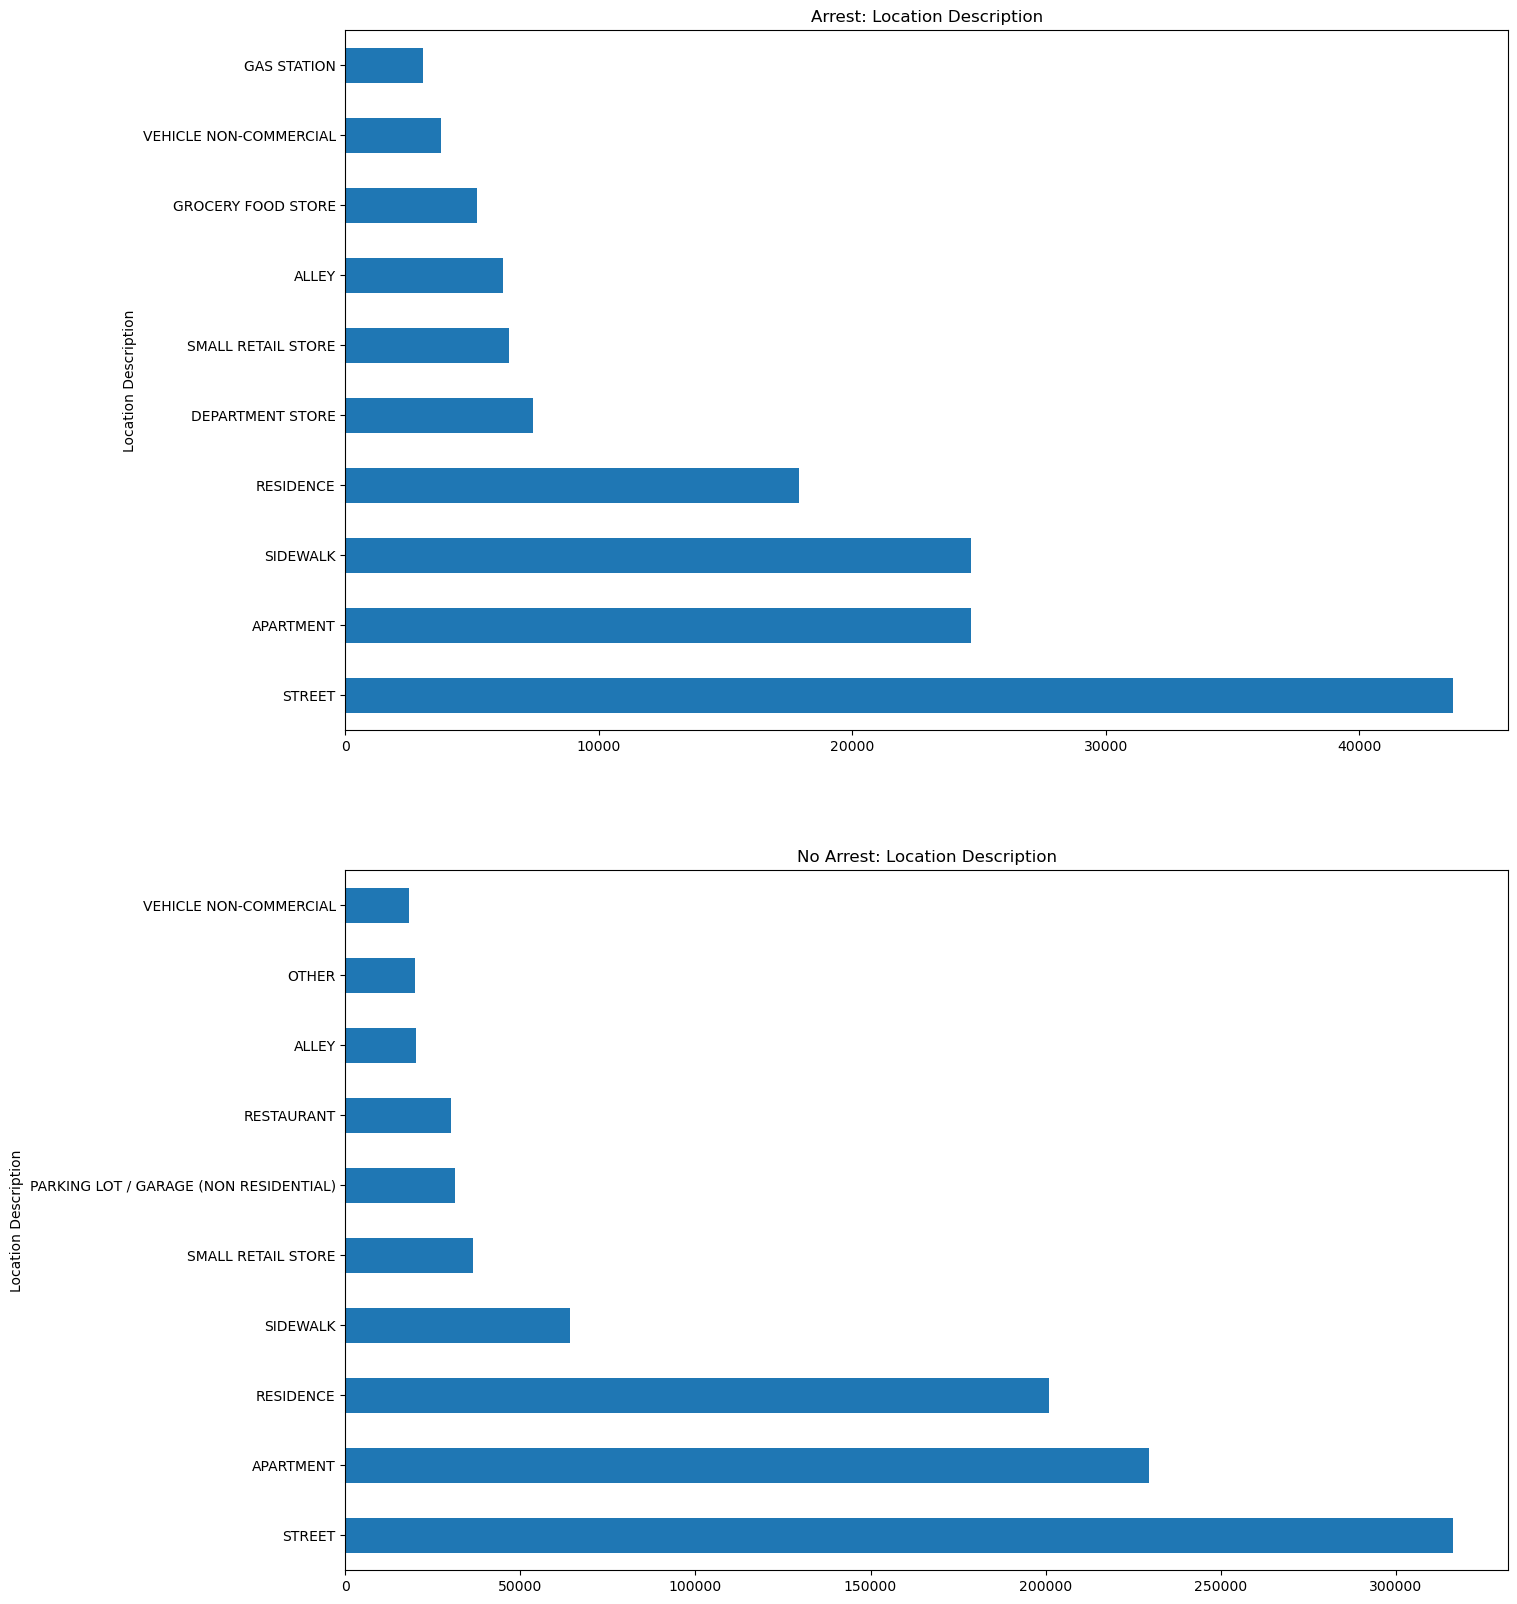

In [44]:
#Create horizontal bar plots for arrests and non-arrests by location description
fn_barplot(df, 'Location Description')

As we can observe that the highest count of location which results in an arrest is Street, Apartment and Sidewalk. Also top locations that did not result in arrests were Street , Apartment and Residence.

## Geospatial Analysis

In [45]:
# Import the folium library
import folium

In [46]:
# Define the coordinates for the center of the map (Chicago)
Chicago_CoOrdinates = [41.881832, -87.623177]
# Initialize the map centered on Chicago with a specified zoom level
chicago_map = folium.Map(location=Chicago_CoOrdinates, zoom_start=10)

In [47]:
# Define a function to create a crime map for a specific crime type
def fn_crime_map(crime_type):
    # Filter the dataframe for the specified crime type
    Crimes = df[df["Primary Type"] == crime_type]
    # Group by 'Community Area' and take the first occurrence
    locations = Crimes.groupby('Community Area').first()
    new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest','Block' ]]
    
    
    # Iterate through the locations and create markers for the map
    for i in range(len(new_locations)):
        lat = new_locations.iloc[i][0]
        long = new_locations.iloc [i][1]
        # Format the popup text with community index, arrest status, location, and block
        popup_text = """community_index : {}<br>
                    Arrest : {}<br>
                    location : {}<br>
                    Block : {}<br>
                    """
        popup_text = popup_text.format(new_locations.index[i],
                                new_locations.iloc[i][-2], 
                                new_locations.iloc [i][-3],
                                new_locations.iloc [i][4]
                                )       
        # Add a CircleMarker to the map with the specified location and popup text
        folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)
        
    return chicago_map

In [48]:
# Define a function to create a crime map for multiple crime types with color coding
def fn_crime_map(crime_types):
    chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)  # Initialize map
     # Define a color map
    color_map = {
        'THEFT': 'blue',
        'BATTERY': 'red',
        'CRIMINAL DAMAGE': 'green'
        
    }
    for crime_type in crime_types:
        Crimes = df[df["Primary Type"] == crime_type]
        locations = Crimes.groupby('Community Area').first()
        new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest', 'Block']]
        
        # Iterate through the locations and create markers for the map
        for i in range(len(new_locations)):
            lat = new_locations.iloc[i][0]
            long = new_locations.iloc[i][1]
            # Format the popup text with community index, arrest status, location, and block
            popup_text = """community_index : {}<br>
                            Arrest : {}<br>
                            location : {}<br>
                            Block : {}<br>
                            """
            popup_text = popup_text.format(new_locations.index[i],
                                            new_locations.iloc[i][-2],
                                            new_locations.iloc[i][-3],
                                            new_locations.iloc[i][4]
                                           )   
            color = color_map.get(crime_type, 'gray')
            folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True, color=color, fill_color=color).add_to(chicago_map)
    
    return chicago_map

In [49]:
# Import Counter from collections to count occurrences
from collections import Counter


# Define a function to create a crime map for multiple crime types, focusing on arrests
def fn_crime_map3(crime_types):
  chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)  # Initialize map

  color_map = {
      'THEFT': 'blue',
      'BATTERY': 'red',
      'CRIMINAL DAMAGE': 'green',
      
  }

  arrest_list = []  # List to store location_descriptions for arrests
  arrest_location_counts = {}  # Dictionary to store arrest location counts

  for crime_type in crime_types:
    Crimes = df[df["Primary Type"] == crime_type]
    locations = Crimes.groupby('Community Area').first()
    new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest', 'Block']]

    for i in range(len(new_locations)):
      if new_locations.iloc[i][3]:  # Check if arrest is True
        lat = new_locations.iloc[i][0]
        long = new_locations.iloc[i][1]
        location_description = new_locations.iloc[i][2]
        arrest_list.append(location_description)

        # Update arrest location counts
        arrest_location_counts[location_description] = arrest_location_counts.get(location_description, 0) + 1

        popup_text = """community_index : {}<br>
                       Arrest : {}<br>
                       location : {}<br>
                       Block : {}<br>
                       """.format(new_locations.index[i],
                                 new_locations.iloc[i][-2],
                                 location_description,
                                 new_locations.iloc[i][4])
        color = color_map.get(crime_type, 'gray')
        folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True, color=color, fill_color=color).add_to(chicago_map)

  # Find most frequent arrest locations
  most_frequent_arrests = Counter(arrest_location_counts).most_common(10)  # Adjust limit as needed

  return chicago_map 

In [50]:
# Specify the crime types to plot on the map
crime_types_to_plot = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']

# Call the function to create and display the map with the specified crime types
fn_crime_map3(crime_types_to_plot)


#In summary, the two functions fn_crime_map and fn_crime_map (the second definition) are not used in the final output. 
#Only the fn_crime_map3 function is utilized for generating the final map.

The most common locations for arrests, categorized by specific crimes such as theft, battery, and criminal damage, include apartments, streets, alleys, sidewalks, CTA trains, residences, CTA platforms, department stores, CTA buses, and gas stations.

**Base Map Initialization:**

The map is centered around Chicago with a zoom level of 12.

**Circle Markers for Crimes:**
- The map will display circle markers representing the first recorded instance of specific crimes (THEFT, BATTERY, CRIMINAL DAMAGE) in each community area.
- Colors:
    - THEFT: Blue markers
    - BATTERY: Red markers
    - CRIMINAL DAMAGE: Green markers
    - Default/Other Crimes: Gray markers (though only specified crimes are plotted in this example)
- Each marker includes a popup displaying:
    - The community index (an identifier for the community area)
    - Whether an arrest was made (True or False)
    - The location description (specific place where the crime occurred, e.g., "Street", "Restaurant")
    - The block number

**Arrest Information:**
- Only markers for crimes where an arrest was made are displayed.
- An internal count of the most frequent arrest locations is maintained, but this information is not directly visualized on the map.

**Most Frequent Arrest Locations (Internal Data):**
- The code internally tracks and counts the locations with the highest number of arrests. While this data is collected, it is not displayed on the map. However, it could be used for further analysis or visualization.


The map effectively visualizes the spatial distribution of the selected crime types with markers indicating where crimes occurred, particularly highlighting locations where arrests were made.

In [51]:
from collections import Counter

def fn_crime_map4(crime_types):
  chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)  # Initialize map

  color_map = {
      'THEFT': 'blue',
      'BATTERY': 'red',
      'CRIMINAL DAMAGE': 'green',
     
  }

  domestic_list = []  # List to store location_descriptions for arrests
  domestic_location_counts = {}  # Dictionary to store arrest location counts

  for crime_type in crime_types:
    Crimes = df[df["Primary Type"] == crime_type]
    locations = Crimes.groupby('Community Area').first()
    new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest', 'Block','Domestic']]

    for i in range(len(new_locations)):
      if new_locations.iloc[i][5]:  # Check if arrest is True
        lat = new_locations.iloc[i][0]
        long = new_locations.iloc[i][1]
        location_description = new_locations.iloc[i][2]
        domestic_list.append(location_description)

        # Update arrest location counts 
        domestic_location_counts[location_description] = domestic_location_counts.get(location_description, 0) + 1

        popup_text = """community_index : {}<br>
                       Arrest : {}<br>
                       Location : {}<br>
                       Block : {}<br>
                       """.format(new_locations.index[i],
                                 new_locations.iloc[i][-2],
                                 location_description,
                                 new_locations.iloc[i][4])
        color = color_map.get(crime_type, 'gray')
        folium.CircleMarker(location=[lat, long], popup=popup_text, fill=True, color=color, fill_color=color).add_to(chicago_map)

  # Find most frequent arrest locations 
  most_frequent_domestic = Counter(domestic_location_counts).most_common(10)

  return chicago_map  

In [52]:
crime_types_to_plot = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']
fn_crime_map4(crime_types_to_plot)

The top locations for domestic crimes across specific crime types include apartments, residences, streets, alleys, and various other areas such as non-commercial vehicles, gas stations, and public school buildings.

The code provided generates a Folium map visualizing crime data in Chicago, specifically focusing on crimes classified as domestic incidents. Here's what will be visible on the map:

**Base Map Initialization:**
- The map is centered around Chicago with a zoom level of 12, providing a broad view of the city.

**Circle Markers for Domestic Crimes:**

- The map displays circle markers for crimes classified as "domestic" in the specified categories: THEFT, BATTERY, and CRIMINAL DAMAGE.
- Colors:
    - THEFT: Blue markers
    - BATTERY: Red markers
    - CRIMINAL DAMAGE: Green markers
    - Default/Other Crimes: Gray markers (though only specified crimes are plotted in this example)

- Each marker includes a popup displaying:
    - The community index (an identifier for the community area)
    - Whether an arrest was made (True or False)
    - The location description (specific place where the crime occurred, e.g., "Street", "Restaurant")
    - The block number

**Domestic Crime Information:**

- The map specifically highlights incidents where the 'domestic' flag is set to True.
- Markers indicate the location of these domestic crimes based on latitude and longitude.


**Most Frequent Domestic Crime Locations:**

- The code internally tracks and counts the most frequent locations for domestic crimes. However, this information is not displayed on the map; it is stored for potential further analysis or reporting.


**Summary of Visible Elements:**

- Colored Circle Markers: Representing domestic incidents of specific crimes, with color-coding for easy differentiation.

- Popups: Providing detailed information about each domestic incident, including the arrest status, location description, and block number.




This map visualizes the spatial distribution of domestic crimes in Chicago for the specified types, highlighting areas with domestic incidents using distinct markers and popups.


# Number of crimes per month over different years

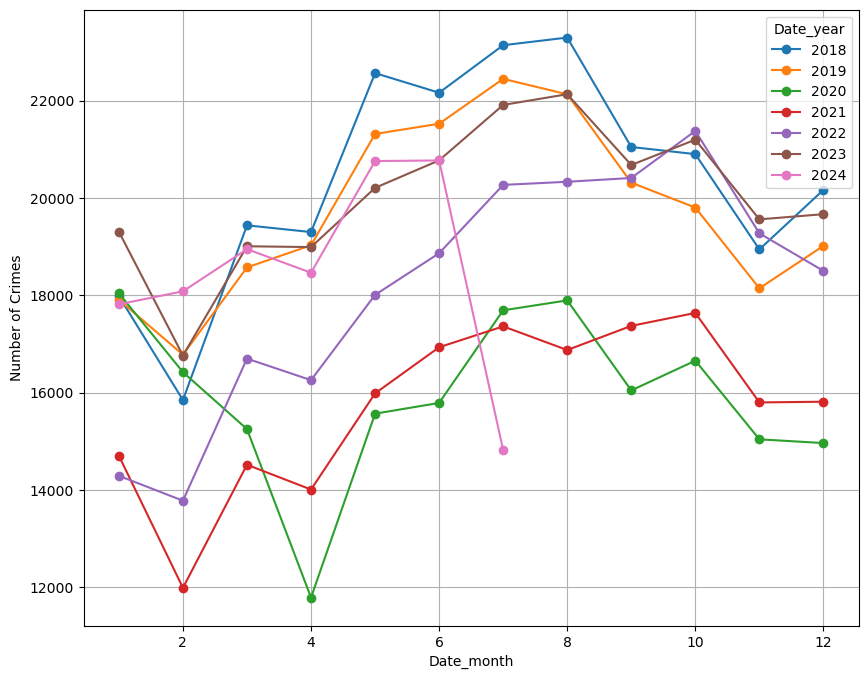

In [53]:
# Number of crimes per month over different years
df.groupby(['Date_month','Date_year'])['ID'].count().unstack().plot(marker='o',figsize=(10,8))
plt.ylabel('Number of Crimes')
plt.grid()
plt.show()

General Trend (2018 - 2023): These years exhibit a pattern of fluctuation across months, with potential seasonal variations. Certain months, like summer (June-August), might see higher crime rates due to increased social activity.

2020: This year displays a clear decrease in crime rates, particularly in the earlier months. This significant drop likely coincides with lockdown measures implemented during the COVID-19 pandemic.

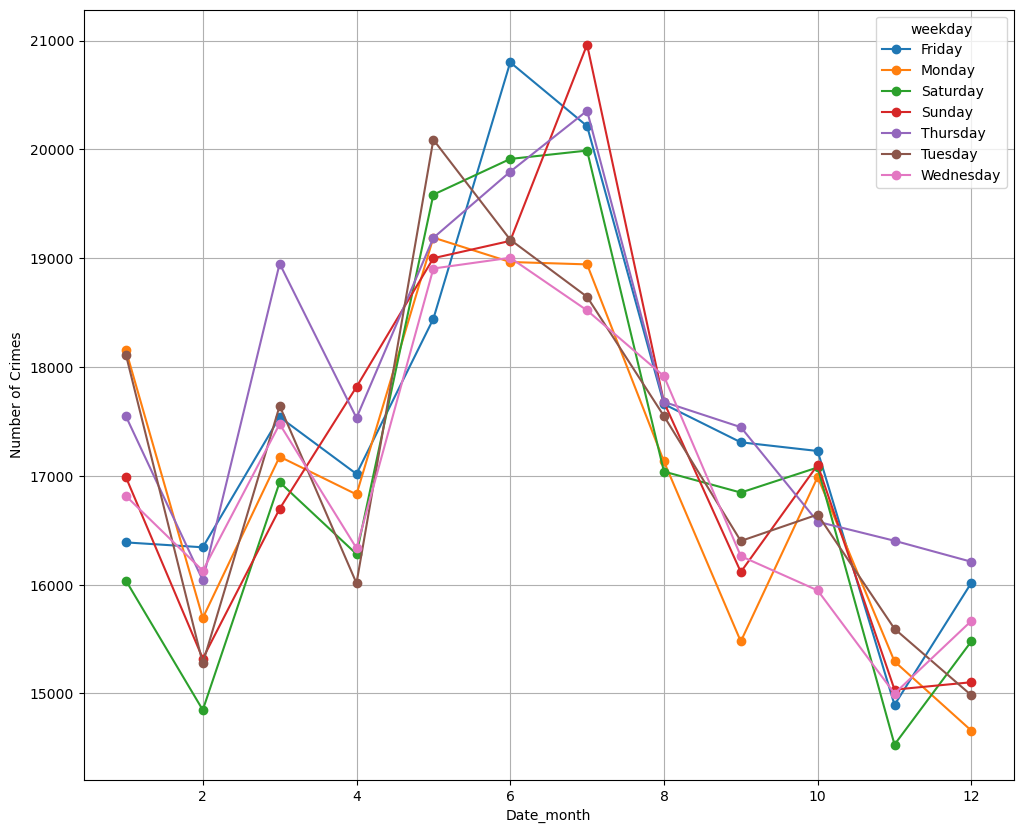

In [54]:
# Mapping day numbers to day names
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'}
df['weekday'] = df['Date_weekday'].map(dayOfWeek)


# Number of crimes per month and weekday
df.groupby(['Date_month','weekday'])['ID'].count().unstack().plot(marker='o',figsize=(12,10))
plt.ylabel('Number of Crimes')
plt.grid()
plt.show()

The crime data shows a potential weekend spike, with Thursdays and Fridays seeing higher numbers. This could be due to a combination of factors. More people might be out socializing, leading to increased opportunity for crimes. Businesses with weekend staff reductions could be easier targets. Finally, some reported crimes might be incidents that happened earlier but weren't reported until the weekend.

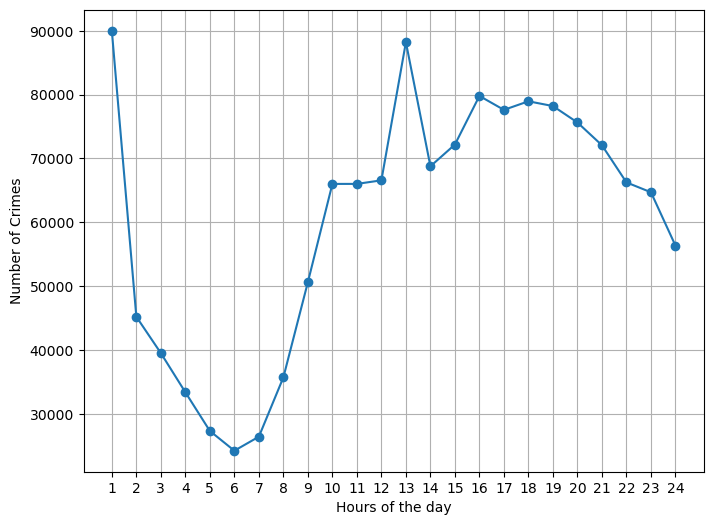

In [55]:
# Grouping by 'Date_hour' and counting the number of crimes
df.groupby(['Date_hour'])['ID'].count().plot(marker='o', figsize=(8, 6))

# Setting y-axis label
plt.ylabel('Number of Crimes')

# Setting x-axis label
plt.xlabel('Hours of the day')

# Setting custom x-ticks
plt.xticks(ticks=range(24), labels=range(1, 25))

# Adding grid
plt.grid()

# Displaying the plot
plt.show()

Again as we can observe most of the crimes occur at 12th hour. (Noon and Midnight)

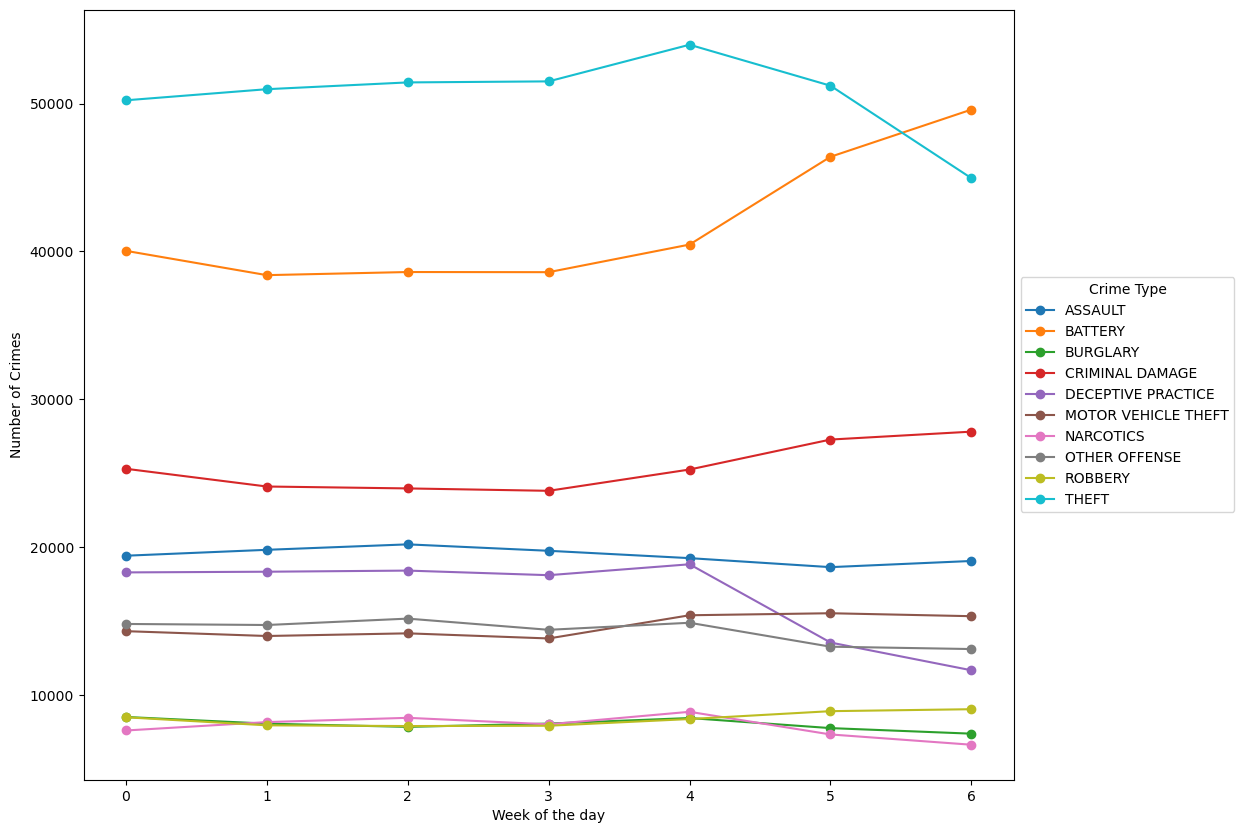

In [56]:

# Group by 'Date_hour' and 'primary_type', count 'unique_key', and unstack
grouped_data1 = df.groupby(['Date_weekday', 'Primary Type'])['ID'].count().unstack()

# Plot the data
ax = grouped_data1.plot(marker='o', figsize=(12, 10))

plt.ylabel('Number of Crimes')
plt.xlabel('Week of the day')

# Create a separate legend outside the plot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Crime Type', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Battery and criminal damage crimes increases in the weekends

**Top 5 districts with the highest crime frequency**

In [57]:
# Top 5 districts with the highest crime frequency
# Grouping data by district and crime type, then counting the number of crimes (ID)
# Sorting the data and getting the top 5 districts
crime_frequency = df.groupby(["District", "Primary Type"]).count()
top_5_districts = crime_frequency['ID'].sort_values( ascending=False).head(5)
top_5_districts

District  Primary Type
18        THEFT           34407
1         THEFT           33661
19        THEFT           28340
12        THEFT           26308
6         BATTERY         21025
Name: ID, dtype: int64

# Multivarite Analysis

In [58]:
# Selecting specific columns for multivariate analysis
cols = ['Primary Type', 'Location Description', 'Arrest', 'Year', 'District']

In [59]:
df_selected = df[cols]

In [60]:
# Displaying the dataframe
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_weekday,weekday
0,13539851,JH359575,2024-07-23 00:00:00,043XX S ELLIS AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,41.815969,-87.601835,"(41.815968533, -87.601835172)",2024,7,23,0,0,1,Monday
1,13539770,JH358272,2024-07-23 00:00:00,003XX W GARFIELD BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,41.794130,-87.634996,"(41.794130134, -87.634996434)",2024,7,23,0,0,1,Monday
2,13538765,JH358119,2024-07-23 00:00:00,011XX S DESPLAINES ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,SIDEWALK,False,True,...,41.867633,-87.643673,"(41.867632859, -87.643672873)",2024,7,23,0,0,1,Monday
3,13539086,JH358837,2024-07-23 00:00:00,038XX S WELLS ST,0560,ASSAULT,SIMPLE,STREET,False,True,...,41.824266,-87.632482,"(41.824266191, -87.632482389)",2024,7,23,0,0,1,Monday
4,13539910,JH359581,2024-07-23 00:00:00,035XX W AINSLIE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,41.970192,-87.716260,"(41.970191532, -87.716260008)",2024,7,23,0,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,12631226,JF160669,2018-01-02 00:00:00,017XX W 84TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,NaN,NaN,NaN,2018,1,2,0,0,1,Monday
1594866,11192999,JB101143,2018-01-01 23:55:00,132XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,41.654600,-87.613149,"(41.65460049, -87.613148723)",2018,1,1,23,55,0,Sunday
1594867,11192968,JB101131,2018-01-01 23:45:00,006XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,41.893647,-87.631177,"(41.893646656, -87.631177143)",2018,1,1,23,45,0,Sunday
1594868,11192996,JB101134,2018-01-01 23:40:00,105XX S WENTWORTH AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,41.702294,-87.628151,"(41.702294054, -87.628150774)",2018,1,1,23,40,0,Sunday


In [61]:
# Checking the columns of the dataframe
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Date_year', 'Date_month', 'Date_day', 'Date_hour',
       'Date_minute', 'Date_weekday', 'weekday'],
      dtype='object')

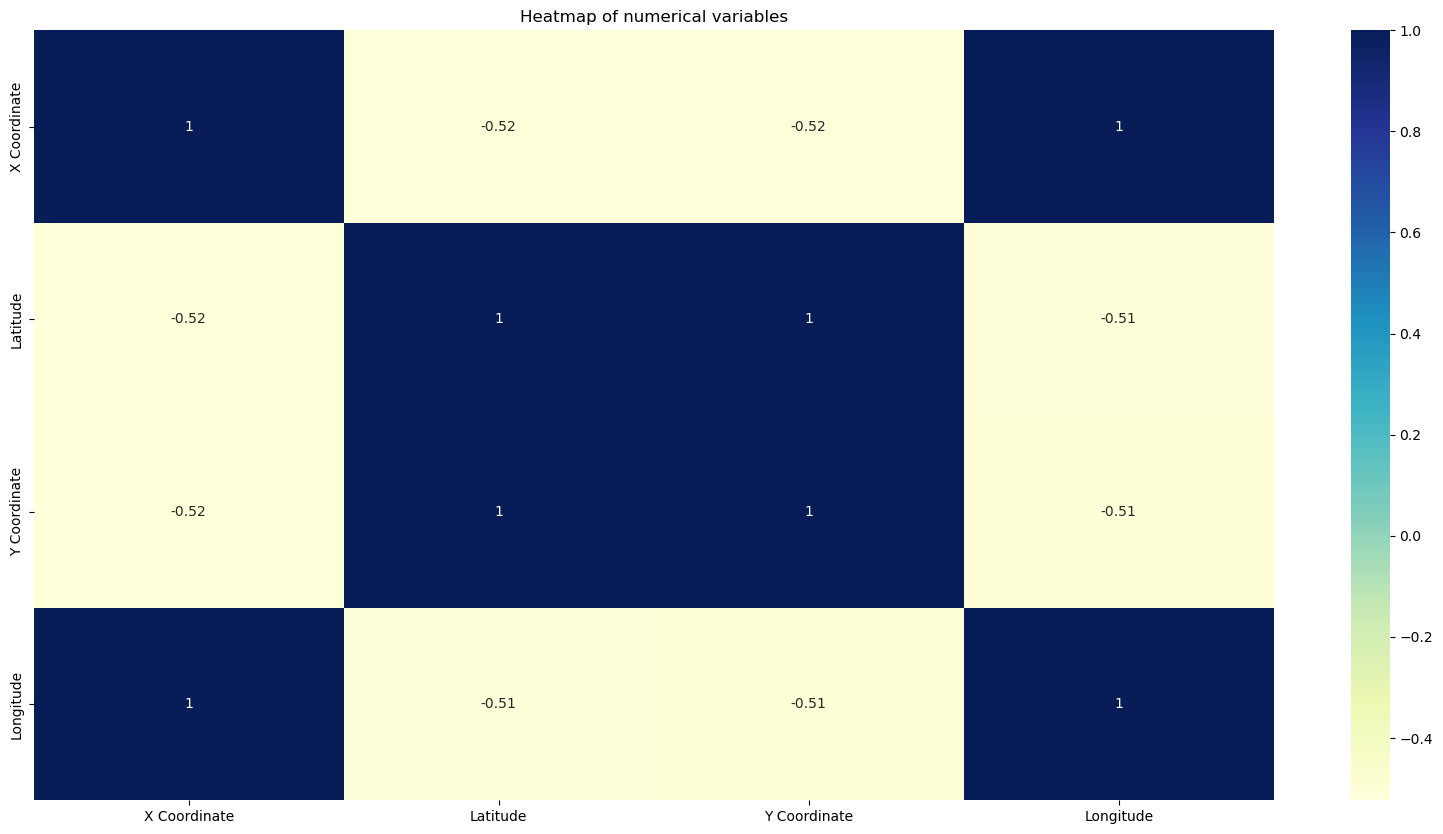

In [62]:
# Numeric features for correlation analysis
numeric_features = ['X Coordinate','Latitude','Y Coordinate','Longitude']
co = df[numeric_features]

# Plotting heatmap for numeric features
plt.figure(figsize=(20, 10))
sns.heatmap(co.corr(), annot = True, cmap="YlGnBu")
plt.title('Heatmap of numerical variables')
plt.show()

# Data Preparation

**The columns that dont have much significance**

In [63]:
# Dropping columns that are not needed for the analysis
columns_to_drop = ['ID', 'Case Number', 'Updated On', 'X Coordinate', 'Y Coordinate','Location', 'Description', 'FBI Code', 'IUCR']
df.drop(columns=columns_to_drop, inplace=True)
df

,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_weekday,weekday
0,2024-07-23 00:00:00,043XX S ELLIS AVE,MOTOR VEHICLE THEFT,STREET,False,False,222,2,4.0,39.0,2024,41.815969,-87.601835,2024,7,23,0,0,1,Monday
1,2024-07-23 00:00:00,003XX W GARFIELD BLVD,THEFT,STREET,False,False,711,7,20.0,68.0,2024,41.794130,-87.634996,2024,7,23,0,0,1,Monday
2,2024-07-23 00:00:00,011XX S DESPLAINES ST,BATTERY,SIDEWALK,False,True,124,1,28.0,28.0,2024,41.867633,-87.643673,2024,7,23,0,0,1,Monday
3,2024-07-23 00:00:00,038XX S WELLS ST,ASSAULT,STREET,False,True,915,9,3.0,34.0,2024,41.824266,-87.632482,2024,7,23,0,0,1,Monday
4,2024-07-23 00:00:00,035XX W AINSLIE ST,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,1712,17,33.0,14.0,2024,41.970192,-87.716260,2024,7,23,0,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,2018-01-02 00:00:00,017XX W 84TH ST,DECEPTIVE PRACTICE,APARTMENT,False,False,614,6,21.0,71.0,2018,NaN,NaN,2018,1,2,0,0,1,Monday
1594866,2018-01-01 23:55:00,132XX S DR MARTIN LUTHER KING JR DR,BATTERY,APARTMENT,False,True,533,5,9.0,54.0,2018,41.654600,-87.613149,2018,1,1,23,55,0,Sunday
1594867,2018-01-01 23:45:00,006XX N CLARK ST,THEFT,SMALL RETAIL STORE,False,False,1832,18,42.0,8.0,2018,41.893647,-87.631177,2018,1,1,23,45,0,Sunday
1594868,2018-01-01 23:40:00,105XX S WENTWORTH AVE,BATTERY,STREET,False,False,512,5,34.0,49.0,2018,41.702294,-87.628151,2018,1,1,23,40,0,Sunday


In [64]:
# Checking the columns of the dataframe after dropping
df.columns

Index(['Date', 'Block', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year',
       'Latitude', 'Longitude', 'Date_year', 'Date_month', 'Date_day',
       'Date_hour', 'Date_minute', 'Date_weekday', 'weekday'],
      dtype='object')

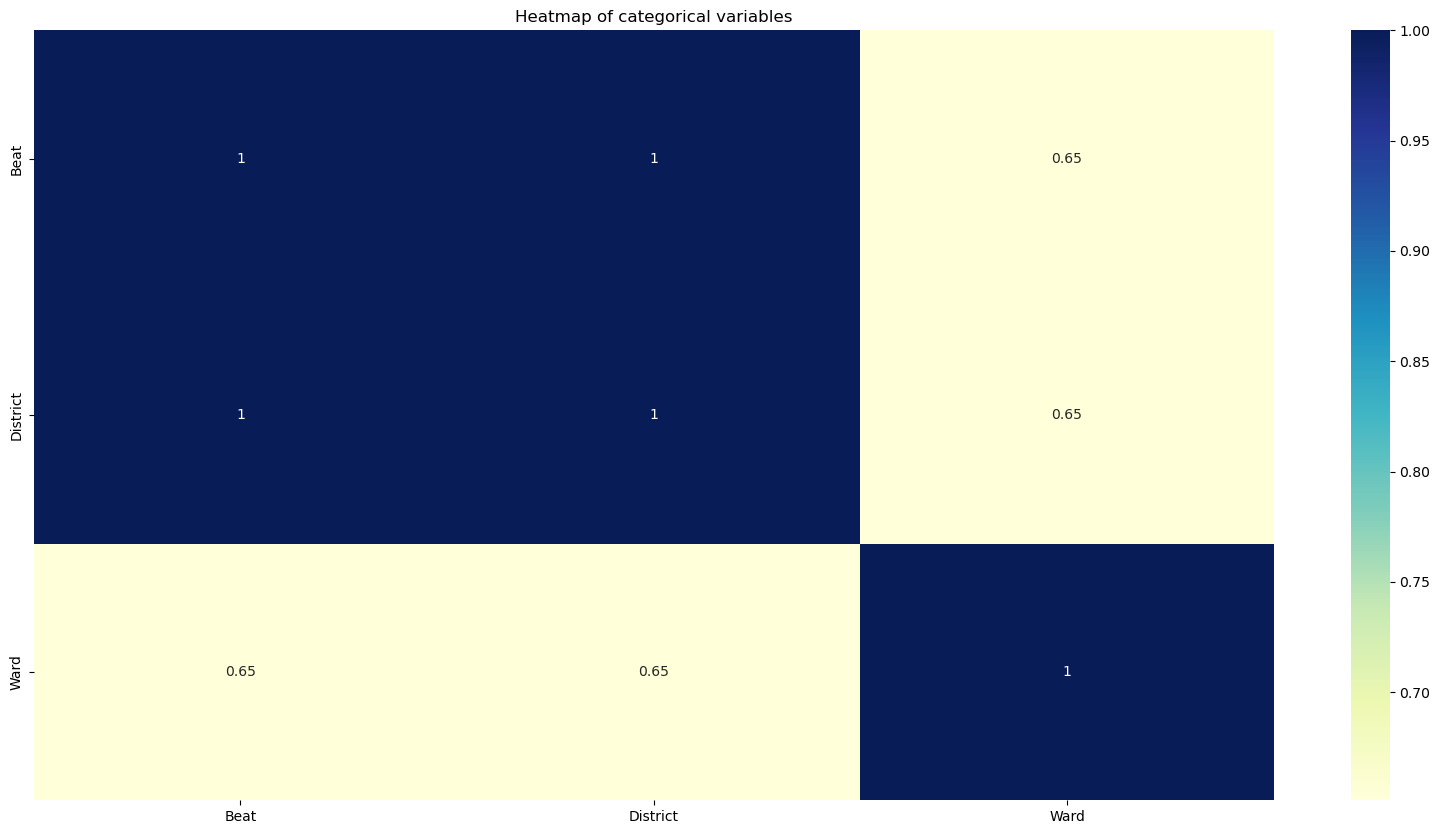

In [65]:
categorical_features = ['Beat', 'District', 'Ward']
co = df[categorical_features]
plt.figure(figsize=(20, 10))
sns.heatmap(co.corr(), annot = True, cmap="YlGnBu")
plt.title('Heatmap of categorical variables')
plt.show()

Block / district / ward / community_area (Use only one of these) : Since these 4 are multicollinear we can just use one of them

In [66]:
# Dropping additional columns that are not needed
df.drop(columns=['Block','Ward','Beat','Community Area'], inplace=True)
df

,Date,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_weekday,weekday
0,2024-07-23 00:00:00,MOTOR VEHICLE THEFT,STREET,False,False,2,2024,41.815969,-87.601835,2024,7,23,0,0,1,Monday
1,2024-07-23 00:00:00,THEFT,STREET,False,False,7,2024,41.794130,-87.634996,2024,7,23,0,0,1,Monday
2,2024-07-23 00:00:00,BATTERY,SIDEWALK,False,True,1,2024,41.867633,-87.643673,2024,7,23,0,0,1,Monday
3,2024-07-23 00:00:00,ASSAULT,STREET,False,True,9,2024,41.824266,-87.632482,2024,7,23,0,0,1,Monday
4,2024-07-23 00:00:00,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,2024,41.970192,-87.716260,2024,7,23,0,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,2018-01-02 00:00:00,DECEPTIVE PRACTICE,APARTMENT,False,False,6,2018,NaN,NaN,2018,1,2,0,0,1,Monday
1594866,2018-01-01 23:55:00,BATTERY,APARTMENT,False,True,5,2018,41.654600,-87.613149,2018,1,1,23,55,0,Sunday
1594867,2018-01-01 23:45:00,THEFT,SMALL RETAIL STORE,False,False,18,2018,41.893647,-87.631177,2018,1,1,23,45,0,Sunday
1594868,2018-01-01 23:40:00,BATTERY,STREET,False,False,5,2018,41.702294,-87.628151,2018,1,1,23,40,0,Sunday


# Feature Engineering

## Creating a new feature

Creating a **Covid indicator variable (Pre-Covid, Lockdown, Covid, Post-Covid)** to capture potential crime trends during different pandemic stages. This leverages expert knowledge to enrich the model with potentially relevant factors.

In [67]:

# Defining lockdown start and end dates
lockdown_start_year = 2020
lockdown_start_month = 3
lockdown_start_day = 15

lockdown_end_year = 2020
lockdown_end_month = 6
lockdown_end_day = 15

def add_covid_indicator(df):
  """
  This function adds a new column named 'covid_phase' to the dataframe 'df'.
  The new column indicates the COVID-19 phase based on year, month, and day.
  """
  df['covid_phase'] = 'Pre-COVID'
  lockdown_start_date = pd.to_datetime(f'{lockdown_start_year}-{lockdown_start_month}-{lockdown_start_day}')
  lockdown_end_date = pd.to_datetime(f'{lockdown_end_year}-{lockdown_end_month}-{lockdown_end_day}')
    
  df['Date'] = df['Date'].dt.tz_localize(None)
  
  df.loc[df['Date'] < lockdown_start_date, 'covid_phase'] = 'Pre-COVID'
  df.loc[(df['Date'] >= lockdown_start_date) & (df['Date'] < lockdown_end_date), 'covid_phase'] = 'Lockdown'
  df.loc[df['Date'] >= lockdown_end_date, 'covid_phase'] = 'COVID'
  df.loc[df['Date'] >= pd.to_datetime('2022-04-16'), 'covid_phase'] = 'Post-COVID'
  
  df.drop('Date', axis=1, inplace=True)  
  return df

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1449706 entries, 0 to 1594869
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Date                  1449706 non-null  datetime64[ns]
 1   Primary Type          1449706 non-null  object        
 2   Location Description  1441445 non-null  object        
 3   Arrest                1449706 non-null  bool          
 4   Domestic              1449706 non-null  bool          
 5   District              1449706 non-null  int64         
 6   Year                  1449706 non-null  int64         
 7   Latitude              1428205 non-null  float64       
 8   Longitude             1428205 non-null  float64       
 9   Date_year             1449706 non-null  int64         
 10  Date_month            1449706 non-null  int64         
 11  Date_day              1449706 non-null  int64         
 12  Date_hour             1449706 non-null  int64  

In [69]:
# Add the new column with the COVID-19 indicator variable
df = add_covid_indicator(df.copy())

# Print the dataframe head to see the new column
df

,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_weekday,weekday,covid_phase
0,MOTOR VEHICLE THEFT,STREET,False,False,2,2024,41.815969,-87.601835,2024,7,23,0,0,1,Monday,Post-COVID
1,THEFT,STREET,False,False,7,2024,41.794130,-87.634996,2024,7,23,0,0,1,Monday,Post-COVID
2,BATTERY,SIDEWALK,False,True,1,2024,41.867633,-87.643673,2024,7,23,0,0,1,Monday,Post-COVID
3,ASSAULT,STREET,False,True,9,2024,41.824266,-87.632482,2024,7,23,0,0,1,Monday,Post-COVID
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,2024,41.970192,-87.716260,2024,7,23,0,0,1,Monday,Post-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,DECEPTIVE PRACTICE,APARTMENT,False,False,6,2018,NaN,NaN,2018,1,2,0,0,1,Monday,Pre-COVID
1594866,BATTERY,APARTMENT,False,True,5,2018,41.654600,-87.613149,2018,1,1,23,55,0,Sunday,Pre-COVID
1594867,THEFT,SMALL RETAIL STORE,False,False,18,2018,41.893647,-87.631177,2018,1,1,23,45,0,Sunday,Pre-COVID
1594868,BATTERY,STREET,False,False,5,2018,41.702294,-87.628151,2018,1,1,23,40,0,Sunday,Pre-COVID


Date (original format): Splitting it into year, month, day etc. provides more informative features for analysis. Since we have already done that we dont need the Date in original format.

Date_minute,Date_Hour: The extra granularity of minutes might not be significant for crime type prediction.

In [70]:
# Dropping additional columns that are not needed
df.drop(columns=['Date_hour','Date_minute','Year'], inplace=True)
df

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,Date_day,Date_weekday,weekday,covid_phase
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,23,1,Monday,Post-COVID
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,23,1,Monday,Post-COVID
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,23,1,Monday,Post-COVID
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,23,1,Monday,Post-COVID
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,23,1,Monday,Post-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,DECEPTIVE PRACTICE,APARTMENT,False,False,6,NaN,NaN,2018,1,2,1,Monday,Pre-COVID
1594866,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,1,0,Sunday,Pre-COVID
1594867,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,1,0,Sunday,Pre-COVID
1594868,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,1,0,Sunday,Pre-COVID


In [71]:
# Checking for duplicate rows in the dataframe
duplicate = df[df.duplicated()]
duplicate

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,Date_day,Date_weekday,weekday,covid_phase
96,BATTERY,RESIDENCE,False,True,25,41.926166,-87.794096,2024,7,22,0,Sunday,Post-COVID
267,OTHER OFFENSE,RESIDENCE,False,False,8,41.745500,-87.691292,2024,7,22,0,Sunday,Post-COVID
304,THEFT,DEPARTMENT STORE,False,False,14,41.920460,-87.670831,2024,7,22,0,Sunday,Post-COVID
435,MOTOR VEHICLE THEFT,COMMERCIAL / BUSINESS OFFICE,False,False,12,41.861407,-87.658134,2024,7,22,0,Sunday,Post-COVID
505,THEFT,STREET,False,False,3,41.785273,-87.612077,2024,7,22,0,Sunday,Post-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594179,NARCOTICS,POLICE FACILITY/VEH PARKING LOT,True,False,11,41.868181,-87.709271,2018,1,3,2,Tuesday,Pre-COVID
1594247,OTHER OFFENSE,RESIDENCE,False,False,10,41.848422,-87.684003,2018,1,3,2,Tuesday,Pre-COVID
1594263,DECEPTIVE PRACTICE,NaN,False,False,10,NaN,NaN,2018,1,3,2,Tuesday,Pre-COVID
1594452,THEFT,DEPARTMENT STORE,True,False,1,41.881718,-87.627760,2018,1,2,1,Monday,Pre-COVID


In [72]:
# dropping the duplicate rows 
df = df.drop_duplicates()
df

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,Date_day,Date_weekday,weekday,covid_phase
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,23,1,Monday,Post-COVID
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,23,1,Monday,Post-COVID
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,23,1,Monday,Post-COVID
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,23,1,Monday,Post-COVID
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,23,1,Monday,Post-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594863,DECEPTIVE PRACTICE,APARTMENT,False,False,6,NaN,NaN,2018,1,2,1,Monday,Pre-COVID
1594866,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,1,0,Sunday,Pre-COVID
1594867,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,1,0,Sunday,Pre-COVID
1594868,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,1,0,Sunday,Pre-COVID


In [73]:
# Resetting the index of the dataframe
df.reset_index(inplace=True)

In [74]:
# Dropping the old index column
df.drop(columns=['index'], inplace=True)
df


C:\Users\aisha\AppData\Local\Temp\ipykernel_28316\39199178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index'], inplace=True)


,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,Date_day,Date_weekday,weekday,covid_phase
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,23,1,Monday,Post-COVID
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,23,1,Monday,Post-COVID
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,23,1,Monday,Post-COVID
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,23,1,Monday,Post-COVID
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,23,1,Monday,Post-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434698,DECEPTIVE PRACTICE,APARTMENT,False,False,6,NaN,NaN,2018,1,2,1,Monday,Pre-COVID
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,1,0,Sunday,Pre-COVID
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,1,0,Sunday,Pre-COVID
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,1,0,Sunday,Pre-COVID


In [75]:
# Checking for missing values in the dataframe
df.isnull().sum()

Primary Type                0
Location Description     8083
Arrest                      0
Domestic                    0
District                    0
Latitude                19750
Longitude               19750
Date_year                   0
Date_month                  0
Date_day                    0
Date_weekday                0
weekday                     0
covid_phase                 0
dtype: int64

This indicates that there are missing data points in the location_description, latitude, and longitude columns, with 8083 missing values in location_description and 19750 missing values in both latitude and longitude. All other columns have complete data without any missing values.

In [76]:
df = df.dropna(subset=['Latitude'])
df

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,Date_day,Date_weekday,weekday,covid_phase
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,23,1,Monday,Post-COVID
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,23,1,Monday,Post-COVID
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,23,1,Monday,Post-COVID
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,23,1,Monday,Post-COVID
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,23,1,Monday,Post-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,2,1,Monday,Pre-COVID
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,1,0,Sunday,Pre-COVID
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,1,0,Sunday,Pre-COVID
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,1,0,Sunday,Pre-COVID


drops all rows from the DataFrame df that have missing (NaN) values in the 'latitude' column. 

Since we have a relatively small percentage (1.5%) of missing latitude/longitude values. We can remove the rows.

In [77]:
df.isnull().sum()

Primary Type               0
Location Description    5983
Arrest                     0
Domestic                   0
District                   0
Latitude                   0
Longitude                  0
Date_year                  0
Date_month                 0
Date_day                   0
Date_weekday               0
weekday                    0
covid_phase                0
dtype: int64

#### Constructing interaction features "proximity" (Far/Close) and "distance" to major locations in Chicago for each crime incident. This captures the spatial context of crimes relative to significant landmarks by considering both closeness and actual distance.

In [78]:
from geopy.distance import geodesic

# List of major locations in Chicago with their coordinates
major_locations = [
    ("Millennium Park", 41.8825, -87.6231),
    ("Navy Pier", 41.9004, -87.6169),
    ("Wrigley Field", 41.9481, -87.6561),
    ("Lincoln Park Zoo", 41.9233, -87.6317),
    ("Art Institute of Chicago", 41.8879, -87.6231),
    ("Shedd Aquarium", 41.8871, -87.6336),
    ("Willis Tower (Sears Tower)", 41.8886, -87.6359),
    ("United Center", 41.8849, -87.6741),
    ("Magnificent Mile", 41.9028, -87.6231),  
    ("Grant Park", 41.8822, -87.6219), 
    ("360 Chicago Observation Deck", 41.9019, -87.6332),
    ("Museum of Science and Industry", 41.8625, -87.6219),
    ("Garfield Park Conservatory", 41.9028, -87.7222)
]


def calculate_proximity_and_distance(data):
  """
  This function calculates both proximity and distance to major locations for each crime incident.

  Args:
      data: A pandas DataFrame containing crime data.

  Returns:
      A new DataFrame with additional columns "proximity" and "distance_meters" indicating proximity category and distance to major locations.
  """
  data["proximity"] = "Far"  # Default proximity value for all crimes
  data["distance_meters"] = None  # Initialize distance column with None

# Iterate through each crime incident
  for crime_index, row in data.iterrows():
    crime_lat = row["Latitude"]
    crime_lon = row["Longitude"]
    closest_distance = float('inf')  # Initialize to positive infinity for comparison
    closest_location_name = None

    # Compare distance of each crime to all major locations
    for location_name, location_lat, location_lon in major_locations:
      distance = geodesic((crime_lat, crime_lon), (location_lat, location_lon)).meters
      if distance < closest_distance:
        closest_distance = distance
        closest_location_name = location_name

    # Set proximity based on a threshold
    if closest_distance <= 1600:  # Set 1 mile as the threshold (1600 meters)
      data.at[crime_index, "proximity"] = "Close"
    
    # Update distance for the closest major location
    data.at[crime_index, "distance_meters"] = closest_distance

  return data

In [79]:
# Apply the function to calculate proximity and distance for each crime incident
df = calculate_proximity_and_distance(df.copy())
df

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,Date_day,Date_weekday,weekday,covid_phase,proximity,distance_meters
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,23,1,Monday,Post-COVID,Far,5430.315087
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,23,1,Monday,Post-COVID,Far,7671.377302
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,23,1,Monday,Post-COVID,Far,1895.474329
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,23,1,Monday,Post-COVID,Far,4336.636168
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,23,1,Monday,Post-COVID,Far,5558.416471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,2,1,Monday,Pre-COVID,Far,9595.337616
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,1,0,Sunday,Pre-COVID,Far,23102.573253
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,1,0,Sunday,Pre-COVID,Close,683.984198
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,1,0,Sunday,Pre-COVID,Far,17801.509853


In [80]:
#Dropping Unnecessary Columns
df.drop(columns=['Date_weekday','Date_day'], inplace=True)
df

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853


In [81]:
#Handling Missing Data
df = df.dropna(subset=['Location Description'])
df

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853


Since the count of rows with NULL values for location_description is less than 1% we can simple remove those rows.

Identified a large number of categories for location descriptions.

Many categories represented the same location type but with minor variations in wording (e.g., "HOTEL-," "HOTEL:").

Standardized these variations into a single category to improve data consistency and reduce noise.

This helps the model recognize similar locations more effectively.

In [82]:
# Cleaning Text Data
import re

def remove_special_chars(text):
    """
    This function removes special characters and extra spaces, and converts the text to uppercase.
    """
    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().upper()


#Combining and Standardizing Categories (Phase 1)
def combine_ride_sharing(category):
    """
    This function combines categories related to ride-sharing services (Uber, Lyft, etc.).
    """
    cleaned_category = remove_special_chars(category)
    if "RIDESHARE" in cleaned_category or "UBER" in cleaned_category or "LYFT" in cleaned_category:
        return "VEHICLE - RIDE SHARE SERVICE"
    return cleaned_category

In [83]:


def combine_columns(category):
    """
    This function standardizes categories by combining similar ones.
    """
    category = remove_special_chars(category)
    
    if "VEHICLE" in category:
        category = combine_ride_sharing(category)
        return category
    if "RESIDENCE" in category and "COLLEGE" not in category or "RESIDENTIAL" in category and "NON" not in category: 
        return "RESIDENCE"
    if "OTHER" in category and "VEHICLE" not in category:
        return "OTHER"
    if "SCHOOL" in category:
        return "SCHOOL"
    if "AIRPORT" in category:
        return "AIRPORT"
    if "COLLEGE" in category:
        return "COLLEGE"
    if "CTA" in category:
        return "CTA"
    if "HOSPITAL" in category:
        return "HOSPITAL"
    else:
        return category

In [84]:
# Apply the cleaning function to the dataframe
df_cleaned = df.copy()
df_cleaned["cleaned_category"] = df_cleaned['Location Description'].apply(combine_columns)
df_cleaned

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters,cleaned_category
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087,STREET
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302,STREET
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329,SIDEWALK
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168,STREET
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471,VEHICLE NONCOMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616,RESIDENCE
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253,APARTMENT
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198,SMALL RETAIL STORE
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853,STREET


In [85]:
unique_categories = df['Location Description'].unique()
print(unique_categories)

['STREET' 'SIDEWALK' 'VEHICLE NON-COMMERCIAL'
 'COMMERCIAL / BUSINESS OFFICE' 'DRUG STORE' 'APARTMENT'
 'GOVERNMENT BUILDING / PROPERTY' 'CHA PARKING LOT / GROUNDS'
 'RESIDENCE - GARAGE' 'RESTAURANT' 'CONVENIENCE STORE'
 'PARKING LOT / GARAGE (NON RESIDENTIAL)' 'RESIDENCE' 'ALLEY'
 'HOSPITAL BUILDING / GROUNDS' 'GAS STATION' 'SMALL RETAIL STORE'
 'DEPARTMENT STORE' 'ATHLETIC CLUB' 'RESIDENCE - YARD (FRONT / BACK)'
 'DRIVEWAY - RESIDENTIAL' 'OTHER (SPECIFY)'
 'CHURCH / SYNAGOGUE / PLACE OF WORSHIP'
 'LAKEFRONT / WATERFRONT / RIVERBANK' 'SCHOOL - PUBLIC GROUNDS'
 'OTHER COMMERCIAL TRANSPORTATION' 'LIBRARY' 'CTA PLATFORM'
 'HOTEL / MOTEL' 'CLEANING STORE' 'CTA STATION' 'PARK PROPERTY'
 'NURSING / RETIREMENT HOME' 'CTA BUS STOP' 'RESIDENCE - PORCH / HALLWAY'
 'CASINO/GAMBLING ESTABLISHMENT' 'BAR OR TAVERN' 'VEHICLE - COMMERCIAL'
 'CTA BUS' 'GROCERY FOOD STORE' 'POLICE FACILITY / VEHICLE PARKING LOT'
 'BANK' 'TAXICAB' 'CHA HALLWAY / STAIRWELL / ELEVATOR' 'CHA APARTMENT'
 'CTA TRAIN' 'TAVERN

In [86]:
df_cleaned2 = df.copy()
df_cleaned2["cleaned_category"] = df_cleaned2['Location Description'].apply(combine_columns)
df_cleaned2

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters,cleaned_category
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087,STREET
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302,STREET
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329,SIDEWALK
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168,STREET
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471,VEHICLE NONCOMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616,RESIDENCE
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253,APARTMENT
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198,SMALL RETAIL STORE
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853,STREET


In [87]:
def combine_columns_phase2(category):
  """
  This function identifies categories and returns a single category.
  """
  if "CTA" in category:
    return "CTA"
  if "HOSPITAL" in category: 
    return "HOSPITAL"
  if "HOTEL" in category:
    return "HOTEL"
  if "CHURCH" in category:
    return "CHURCH"
  if "SPORT" in category or "ATHLETIC" in category:
    return "SPORTS"
  if "MOVIE" in category:
    return "MOVIE THEATER"
  if "PARKING" in category:
    return "PARKING"
  if "RIVERBANK" in category:
    return "RIVERBANK"
  else:
    return category

In [88]:
df_cleaned2["cleaned_category"] = df_cleaned2["cleaned_category"].apply(combine_columns_phase2)
df_cleaned2

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters,cleaned_category
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087,STREET
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302,STREET
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329,SIDEWALK
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168,STREET
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471,VEHICLE NONCOMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616,RESIDENCE
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253,APARTMENT
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198,SMALL RETAIL STORE
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853,STREET


In [89]:
def combine_columns_phase3(category):
  """
  This function identifies categories and returns a single category.
  """
  if "NURSING" in category:
    return "NURSING"
  if "TAVERN" in category: 
    return "TAVERN"
  if "BOAT" in category:
    return "BOAT"
  if "MEDICAL" in category:
    return "MEDICAL"
  if "GOVERNMENT BUILDING" in category:
    return "GOVERNMENT BUILDING"
  if "ELEVATOR" in category:
    return "ELEVATOR"
  if "FACTORY" in category:
    return "FACTORY"
  if "HIGHWAY" in category:
    return "HIGHWAY"
  else:
    return category

In [90]:
df_cleaned2["cleaned_category"] = df_cleaned2["cleaned_category"].apply(combine_columns_phase3)
df_cleaned2

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters,cleaned_category
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087,STREET
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302,STREET
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329,SIDEWALK
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168,STREET
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471,VEHICLE NONCOMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616,RESIDENCE
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253,APARTMENT
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198,SMALL RETAIL STORE
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853,STREET


In [91]:
df_cleaned2

,Primary Type,Location Description,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters,cleaned_category
0,MOTOR VEHICLE THEFT,STREET,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087,STREET
1,THEFT,STREET,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302,STREET
2,BATTERY,SIDEWALK,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329,SIDEWALK
3,ASSAULT,STREET,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168,STREET
4,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471,VEHICLE NONCOMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,RESIDENCE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616,RESIDENCE
1434699,BATTERY,APARTMENT,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253,APARTMENT
1434700,THEFT,SMALL RETAIL STORE,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198,SMALL RETAIL STORE
1434701,BATTERY,STREET,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853,STREET


In [92]:
df_cleaned2.drop(columns=['Location Description'], inplace=True)
df_cleaned2

,Primary Type,Arrest,Domestic,District,Latitude,Longitude,Date_year,Date_month,weekday,covid_phase,proximity,distance_meters,cleaned_category
0,MOTOR VEHICLE THEFT,False,False,2,41.815969,-87.601835,2024,7,Monday,Post-COVID,Far,5430.315087,STREET
1,THEFT,False,False,7,41.794130,-87.634996,2024,7,Monday,Post-COVID,Far,7671.377302,STREET
2,BATTERY,False,True,1,41.867633,-87.643673,2024,7,Monday,Post-COVID,Far,1895.474329,SIDEWALK
3,ASSAULT,False,True,9,41.824266,-87.632482,2024,7,Monday,Post-COVID,Far,4336.636168,STREET
4,CRIMINAL DAMAGE,False,False,17,41.970192,-87.716260,2024,7,Monday,Post-COVID,Far,5558.416471,VEHICLE NONCOMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,False,False,16,41.938453,-87.827561,2018,1,Monday,Pre-COVID,Far,9595.337616,RESIDENCE
1434699,BATTERY,False,True,5,41.654600,-87.613149,2018,1,Sunday,Pre-COVID,Far,23102.573253,APARTMENT
1434700,THEFT,False,False,18,41.893647,-87.631177,2018,1,Sunday,Pre-COVID,Close,683.984198,SMALL RETAIL STORE
1434701,BATTERY,False,False,5,41.702294,-87.628151,2018,1,Sunday,Pre-COVID,Far,17801.509853,STREET


In [93]:
df_cleaned2.columns

Index(['Primary Type', 'Arrest', 'Domestic', 'District', 'Latitude',
       'Longitude', 'Date_year', 'Date_month', 'weekday', 'covid_phase',
       'proximity', 'distance_meters', 'cleaned_category'],
      dtype='object')

## One hot encoding the categorical features

In [94]:
# Create a copy of the cleaned dataframe
df_cleaned4 = df_cleaned2.copy()
# one hot encoding for converting the categorical variable to numerical
df_cleaned4 = pd.get_dummies(df_cleaned4, columns=['Arrest','Domestic','District','Date_year','Date_month','weekday','covid_phase','proximity','cleaned_category'], drop_first=True,dtype=int)
df_cleaned4

,Primary Type,Latitude,Longitude,distance_meters,Arrest_True,Domestic_True,District_2,District_3,District_4,District_5,...,cleaned_category_VEHICLE - RIDE SHARE SERVICE,cleaned_category_VEHICLE COMMERCIAL,cleaned_category_VEHICLE COMMERCIAL ENTERTAINMENT PARTY BUS,cleaned_category_VEHICLE COMMERCIAL TROLLEY BUS,cleaned_category_VEHICLE DELIVERY TRUCK,cleaned_category_VEHICLE NONCOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL ENTERTAINMENTPARTY BUS,cleaned_category_VEHICLECOMMERCIAL TROLLEY BUS,cleaned_category_WAREHOUSE
0,MOTOR VEHICLE THEFT,41.815969,-87.601835,5430.315087,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,THEFT,41.794130,-87.634996,7671.377302,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BATTERY,41.867633,-87.643673,1895.474329,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ASSAULT,41.824266,-87.632482,4336.636168,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CRIMINAL DAMAGE,41.970192,-87.716260,5558.416471,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,DECEPTIVE PRACTICE,41.938453,-87.827561,9595.337616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434699,BATTERY,41.654600,-87.613149,23102.573253,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1434700,THEFT,41.893647,-87.631177,683.984198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434701,BATTERY,41.702294,-87.628151,17801.509853,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Label encoding the target variable**

In [95]:
from sklearn.preprocessing import LabelEncoder
#Label encoding the target variable 'Primary Type'
le = LabelEncoder()
df_cleaned4['Primary Type'] = le.fit_transform(df_cleaned4['Primary Type'])
df_cleaned4

,Primary Type,Latitude,Longitude,distance_meters,Arrest_True,Domestic_True,District_2,District_3,District_4,District_5,...,cleaned_category_VEHICLE - RIDE SHARE SERVICE,cleaned_category_VEHICLE COMMERCIAL,cleaned_category_VEHICLE COMMERCIAL ENTERTAINMENT PARTY BUS,cleaned_category_VEHICLE COMMERCIAL TROLLEY BUS,cleaned_category_VEHICLE DELIVERY TRUCK,cleaned_category_VEHICLE NONCOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL ENTERTAINMENTPARTY BUS,cleaned_category_VEHICLECOMMERCIAL TROLLEY BUS,cleaned_category_WAREHOUSE
0,5,41.815969,-87.601835,5430.315087,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,41.794130,-87.634996,7671.377302,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,41.867633,-87.643673,1895.474329,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,41.824266,-87.632482,4336.636168,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,41.970192,-87.716260,5558.416471,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434697,4,41.938453,-87.827561,9595.337616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434699,1,41.654600,-87.613149,23102.573253,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1434700,9,41.893647,-87.631177,683.984198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434701,1,41.702294,-87.628151,17801.509853,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#Create a mapping dictionary for the encoded labels
labels = le.classes_

# Create a mapping dictionary
label_mapping = dict(zip(range(len(labels)), labels))
print(label_mapping)

{0: 'ASSAULT', 1: 'BATTERY', 2: 'BURGLARY', 3: 'CRIMINAL DAMAGE', 4: 'DECEPTIVE PRACTICE', 5: 'MOTOR VEHICLE THEFT', 6: 'NARCOTICS', 7: 'OTHER OFFENSE', 8: 'ROBBERY', 9: 'THEFT'}


In [97]:
# Converting the meters to miles
df_cleaned4['distance_miles'] = df_cleaned4['distance_meters'].apply(lambda x : x / 1600)

In [98]:
#Display the new 'distance_miles' and original 'distance_meters' columns for verification
df_cleaned4[['distance_miles','distance_meters']]

,distance_miles,distance_meters
0,3.393947,5430.315087
1,4.794611,7671.377302
2,1.184671,1895.474329
3,2.710398,4336.636168
4,3.474010,5558.416471
...,...,...
1434697,5.997086,9595.337616
1434699,14.439108,23102.573253
1434700,0.427490,683.984198
1434701,11.125944,17801.509853


In [99]:
# Display all columns to verify the one-hot encoding and label encoding
pd.set_option('display.max_columns', None)
df_cleaned4

,Primary Type,Latitude,Longitude,distance_meters,Arrest_True,Domestic_True,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10,District_11,District_12,District_14,District_15,District_16,District_17,District_18,District_19,District_20,District_22,District_24,District_25,District_31,Date_year_2019,Date_year_2020,Date_year_2021,Date_year_2022,Date_year_2023,Date_year_2024,Date_month_2,Date_month_3,Date_month_4,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_month_9,Date_month_10,Date_month_11,Date_month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,covid_phase_Lockdown,covid_phase_Post-COVID,covid_phase_Pre-COVID,proximity_Far,cleaned_category_AIRCRAFT,cleaned_category_AIRPORT,cleaned_category_ALLEY,cleaned_category_APARTMENT,cleaned_category_APPLIANCE STORE,cleaned_category_ATM AUTOMATIC TELLER MACHINE,cleaned_category_BANK,cleaned_category_BARBERSHOP,cleaned_category_BOAT,cleaned_category_BOWLING ALLEY,cleaned_category_BRIDGE,cleaned_category_CAR WASH,cleaned_category_CASINOGAMBLING ESTABLISHMENT,cleaned_category_CEMETARY,cleaned_category_CHA APARTMENT,cleaned_category_CHURCH,cleaned_category_CLEANING STORE,cleaned_category_COIN OPERATED MACHINE,cleaned_category_COLLEGE,cleaned_category_COMMERCIAL BUSINESS OFFICE,cleaned_category_CONSTRUCTION SITE,cleaned_category_CONVENIENCE STORE,cleaned_category_CREDIT UNION,cleaned_category_CTA,cleaned_category_CURRENCY EXCHANGE,cleaned_category_DAY CARE CENTER,cleaned_category_DEPARTMENT STORE,cleaned_category_DRUG STORE,cleaned_category_ELEVATOR,cleaned_category_FACTORY,cleaned_category_FARM,cleaned_category_FEDERAL BUILDING,cleaned_category_FIRE STATION,cleaned_category_FOREST PRESERVE,cleaned_category_GAS STATION,cleaned_category_GOVERNMENT BUILDING,cleaned_category_GROCERY FOOD STORE,cleaned_category_HIGHWAY,cleaned_category_HORSE STABLE,cleaned_category_HOSPITAL,cleaned_category_HOTEL,cleaned_category_JAIL LOCKUP FACILITY,cleaned_category_KENNEL,cleaned_category_LIBRARY,cleaned_category_MEDICAL,cleaned_category_MOVIE THEATER,cleaned_category_NEWSSTAND,cleaned_category_NURSING,cleaned_category_OTHER,cleaned_category_PARK PROPERTY,cleaned_category_PARKING,cleaned_category_PAWN SHOP,cleaned_category_POOL ROOM,cleaned_category_RESIDENCE,cleaned_category_RESTAURANT,cleaned_category_RIVERBANK,cleaned_category_SAVINGS AND LOAN,cleaned_category_SCHOOL,cleaned_category_SIDEWALK,cleaned_category_SMALL RETAIL STORE,cleaned_category_SPORTS,cleaned_category_STREET,cleaned_category_TAVERN,cleaned_category_TAXICAB,cleaned_category_VACANT LOT LAND,cleaned_category_VACANT LOTLAND,cleaned_category_VEHICLE - RIDE SHARE SERVICE,cleaned_category_VEHICLE COMMERCIAL,cleaned_category_VEHICLE COMMERCIAL ENTERTAINMENT PARTY BUS,cleaned_category_VEHICLE COMMERCIAL TROLLEY BUS,cleaned_category_VEHICLE DELIVERY TRUCK,cleaned_category_VEHICLE NONCOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL ENTERTAINMENTPARTY BUS,cleaned_category_VEHICLECOMMERCIAL TROLLEY BUS,cleaned_category_WAREHOUSE,distance_miles
0,5,41.815969,-87.601835,5430.315087,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.393947
1,9,41.794130,-87.634996,7671.377302,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.794611
2,1,41.867633,-87.643673,1895.474329,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [100]:
# creating a backup
backup1 = df_cleaned4.copy()

In [101]:
#Dropping the original 'distance_meters' column as it is no longer needed
df_cleaned4 = df_cleaned4.drop('distance_meters', axis=1)

In [102]:
df_cleaned4

,Primary Type,Latitude,Longitude,Arrest_True,Domestic_True,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10,District_11,District_12,District_14,District_15,District_16,District_17,District_18,District_19,District_20,District_22,District_24,District_25,District_31,Date_year_2019,Date_year_2020,Date_year_2021,Date_year_2022,Date_year_2023,Date_year_2024,Date_month_2,Date_month_3,Date_month_4,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_month_9,Date_month_10,Date_month_11,Date_month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,covid_phase_Lockdown,covid_phase_Post-COVID,covid_phase_Pre-COVID,proximity_Far,cleaned_category_AIRCRAFT,cleaned_category_AIRPORT,cleaned_category_ALLEY,cleaned_category_APARTMENT,cleaned_category_APPLIANCE STORE,cleaned_category_ATM AUTOMATIC TELLER MACHINE,cleaned_category_BANK,cleaned_category_BARBERSHOP,cleaned_category_BOAT,cleaned_category_BOWLING ALLEY,cleaned_category_BRIDGE,cleaned_category_CAR WASH,cleaned_category_CASINOGAMBLING ESTABLISHMENT,cleaned_category_CEMETARY,cleaned_category_CHA APARTMENT,cleaned_category_CHURCH,cleaned_category_CLEANING STORE,cleaned_category_COIN OPERATED MACHINE,cleaned_category_COLLEGE,cleaned_category_COMMERCIAL BUSINESS OFFICE,cleaned_category_CONSTRUCTION SITE,cleaned_category_CONVENIENCE STORE,cleaned_category_CREDIT UNION,cleaned_category_CTA,cleaned_category_CURRENCY EXCHANGE,cleaned_category_DAY CARE CENTER,cleaned_category_DEPARTMENT STORE,cleaned_category_DRUG STORE,cleaned_category_ELEVATOR,cleaned_category_FACTORY,cleaned_category_FARM,cleaned_category_FEDERAL BUILDING,cleaned_category_FIRE STATION,cleaned_category_FOREST PRESERVE,cleaned_category_GAS STATION,cleaned_category_GOVERNMENT BUILDING,cleaned_category_GROCERY FOOD STORE,cleaned_category_HIGHWAY,cleaned_category_HORSE STABLE,cleaned_category_HOSPITAL,cleaned_category_HOTEL,cleaned_category_JAIL LOCKUP FACILITY,cleaned_category_KENNEL,cleaned_category_LIBRARY,cleaned_category_MEDICAL,cleaned_category_MOVIE THEATER,cleaned_category_NEWSSTAND,cleaned_category_NURSING,cleaned_category_OTHER,cleaned_category_PARK PROPERTY,cleaned_category_PARKING,cleaned_category_PAWN SHOP,cleaned_category_POOL ROOM,cleaned_category_RESIDENCE,cleaned_category_RESTAURANT,cleaned_category_RIVERBANK,cleaned_category_SAVINGS AND LOAN,cleaned_category_SCHOOL,cleaned_category_SIDEWALK,cleaned_category_SMALL RETAIL STORE,cleaned_category_SPORTS,cleaned_category_STREET,cleaned_category_TAVERN,cleaned_category_TAXICAB,cleaned_category_VACANT LOT LAND,cleaned_category_VACANT LOTLAND,cleaned_category_VEHICLE - RIDE SHARE SERVICE,cleaned_category_VEHICLE COMMERCIAL,cleaned_category_VEHICLE COMMERCIAL ENTERTAINMENT PARTY BUS,cleaned_category_VEHICLE COMMERCIAL TROLLEY BUS,cleaned_category_VEHICLE DELIVERY TRUCK,cleaned_category_VEHICLE NONCOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL,cleaned_category_VEHICLECOMMERCIAL ENTERTAINMENTPARTY BUS,cleaned_category_VEHICLECOMMERCIAL TROLLEY BUS,cleaned_category_WAREHOUSE,distance_miles
0,5,41.815969,-87.601835,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.393947
1,9,41.794130,-87.634996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.794611
2,1,41.867633,-87.643673,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.184671
3,0,41.824266,-87.632482,0,1,0,0,0,0,

In [103]:
#Calculate and display the percentage distribution of the 'Primary Type' labels
percentage_counts = df_cleaned4['Primary Type'].value_counts(normalize=True) * 100
print(percentage_counts)

Primary Type
9    24.263398
1    20.555441
3    12.433977
0     9.604108
4     7.269921
5     7.220168
7     6.979638
8     4.142175
2     3.920949
6     3.610226
Name: proportion, dtype: float64


# Prepped Data Review

In [104]:
def plot_numerical_features(df,feature):
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = feature,kde = True)
    plt.title('Histogram for {}'.format(feature))
    plt.xlabel(feature)


    plt.subplot(1, 2, 2) 
    sns.boxplot(df[feature])
    plt.title('Box Plot for  {}'.format(feature))
    plt.xlabel(feature)
    plt.show();

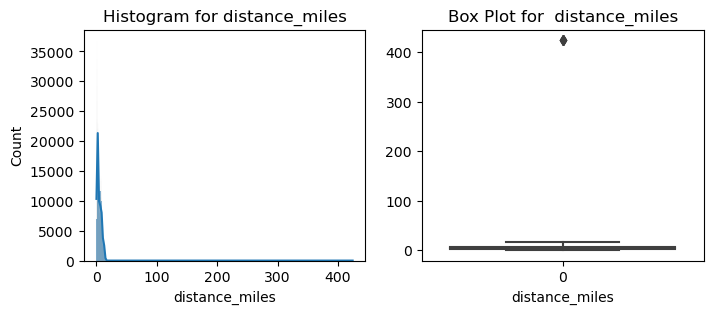

In [105]:
# Call the function to plot the 'distance_miles' feature
plot_numerical_features(df_cleaned4, 'distance_miles')

Distance miles follows a right skewed distribution . It has a single outlier.

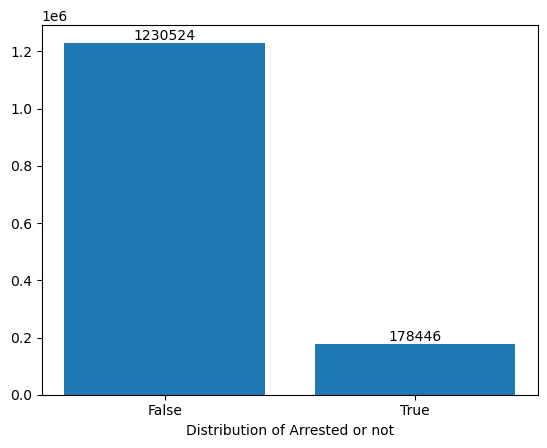

In [106]:
#Plotting Distribution of Arrests

value_cnt = df_cleaned4['Arrest_True'].value_counts()
plt.bar(value_cnt.index, value_cnt.values)

plt.xlabel('Arrest')
plt.xlabel('Count')
plt.xlabel('Distribution of Arrested or not')

for i, cnt in enumerate(value_cnt.values):
    plt.text(i, cnt, str(cnt), ha = 'center', va = 'bottom')

    
plt.xticks([0,1],['False', 'True'])

plt.show()

As we see for most of the crimes arrest did not happen.

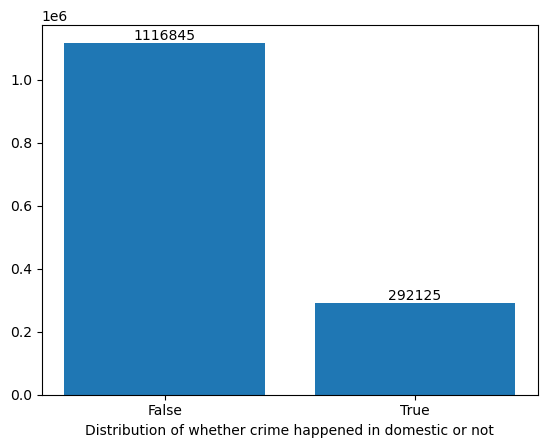

In [107]:
#Plotting Distribution of Domestic Crimes
value_cnt = df_cleaned4['Domestic_True'].value_counts()
plt.bar(value_cnt.index, value_cnt.values)

plt.xlabel('Domestic')
plt.xlabel('Count')
plt.xlabel('Distribution of whether crime happened in domestic or not')

for i, cnt in enumerate(value_cnt.values):
    plt.text(i, cnt, str(cnt), ha = 'center', va = 'bottom')

    
plt.xticks([0,1],['False', 'True'])

plt.show()

As we can see most of the crimes are not domestic.

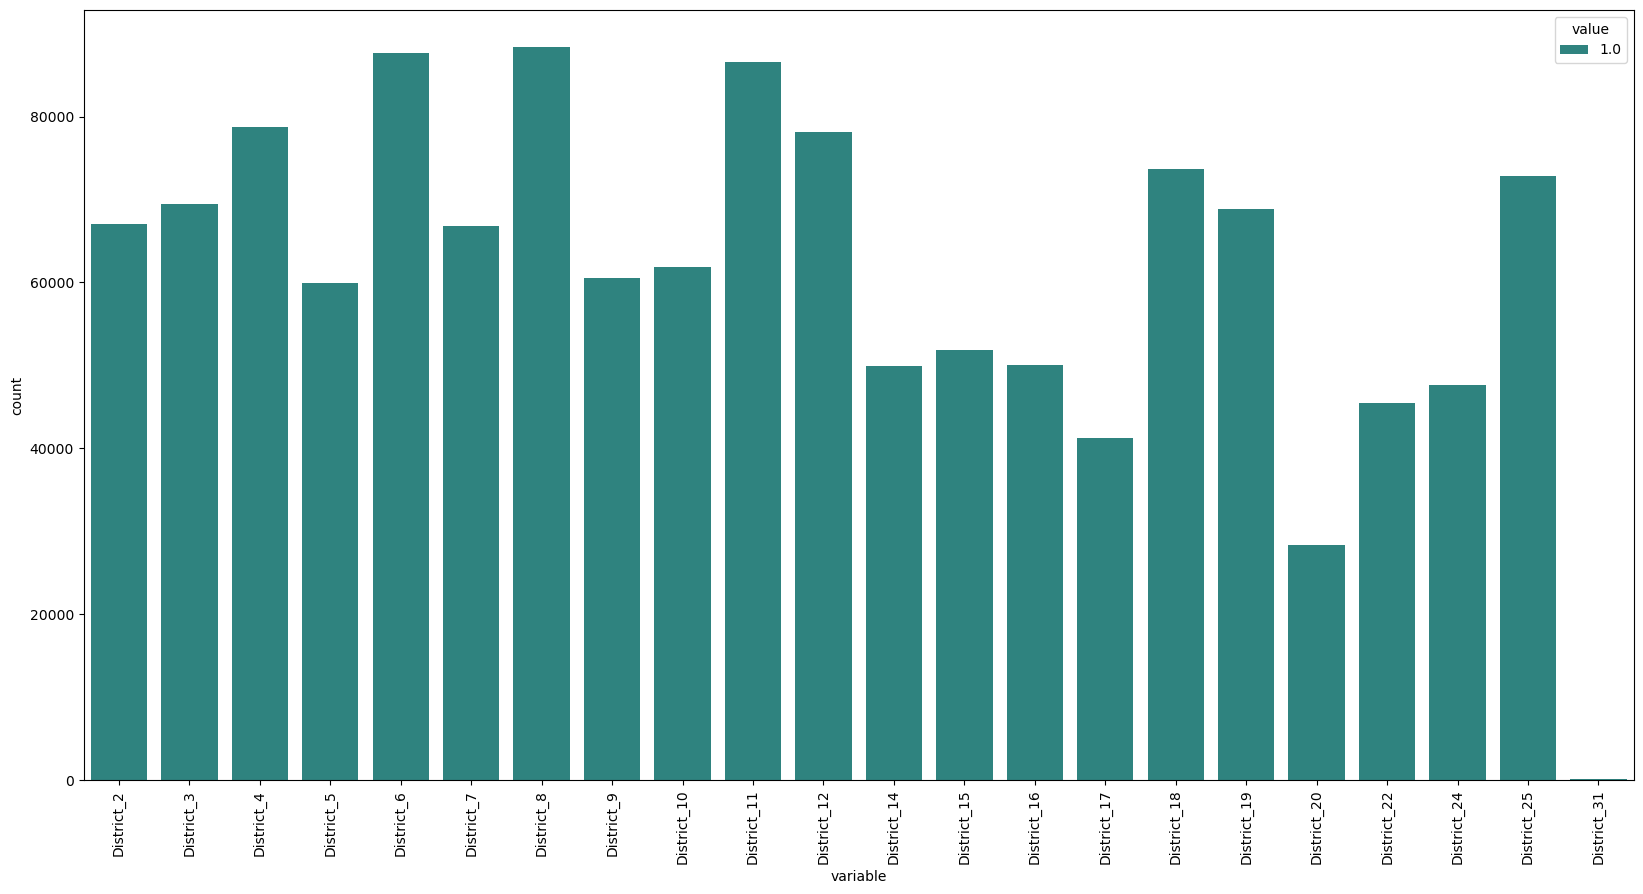

In [108]:
#Plotting Crime Distribution Across Districts
plt.figure(figsize=(20, 10))
district_df = df_cleaned4[['District_2','District_3','District_4','District_5',
'District_6','District_7','District_8','District_9',
'District_10','District_11','District_12','District_14',
'District_15','District_16','District_17','District_18',
'District_19','District_20','District_22','District_24','District_25','District_31']]

district_df = district_df[district_df == 1]

# Plot using Seaborn
sns.countplot(data=pd.melt(district_df), x='variable', hue='value', palette='viridis')
plt.xticks(rotation = 90)
plt.show()

Since we has already showed the bar chart of different districts this is just the dummy encoded variable of it and represents the same information.

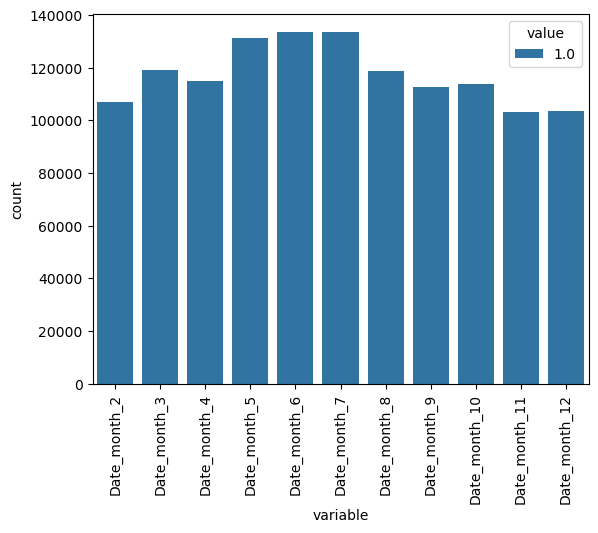

In [109]:
#Plotting Crime Distribution Across Months
month_df = df_cleaned4[['Date_month_2','Date_month_3','Date_month_4','Date_month_5',
'Date_month_6','Date_month_7','Date_month_8','Date_month_9','Date_month_10','Date_month_11','Date_month_12']]


month_df = month_df[month_df == 1]

# Plot using Seaborn
sns.countplot(data=pd.melt(month_df), x='variable', hue='value')
plt.xticks(rotation = 90)
plt.show()

# Machine Learning Models

In [110]:
# Creating a backup dataframe to preserve the original data
backup_data = df_cleaned4.copy()

In [111]:
def calculate_metrics(y_train,y_predict):
    # calculates the accuracy of the model's predictions on the training data
    acc = accuracy_score(y_train, y_predict)
    # creates a confusion matrix, which provides a detailed breakdown of the model's performance.
    conf_matrix = confusion_matrix(y_train, y_predict)
    # generates a classification report, which provides additional metrics such as precision, recall, F1-score, 
    # and support for each class.
    report = classification_report(y_train, y_predict)

    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{report}")

Train Test Splitting

In [112]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_cleaned4.drop('Primary Type', axis=1)
y = df_cleaned4['Primary Type']

# Perform the split, using 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Print shapes of the training and testing data
print(X_train.shape)
print(y_train.shape)

(1127176, 130)
(1127176,)


In [114]:
print(X_test.shape)
print(y_test.shape)

(281794, 130)
(281794,)


**Employing a Decision Tree Classifier model to identify the top 30 features most impactful in capturing data patterns relevant to crime prediction.**

This data-driven approach ensures the model focuses on the most informative features for accurate results.

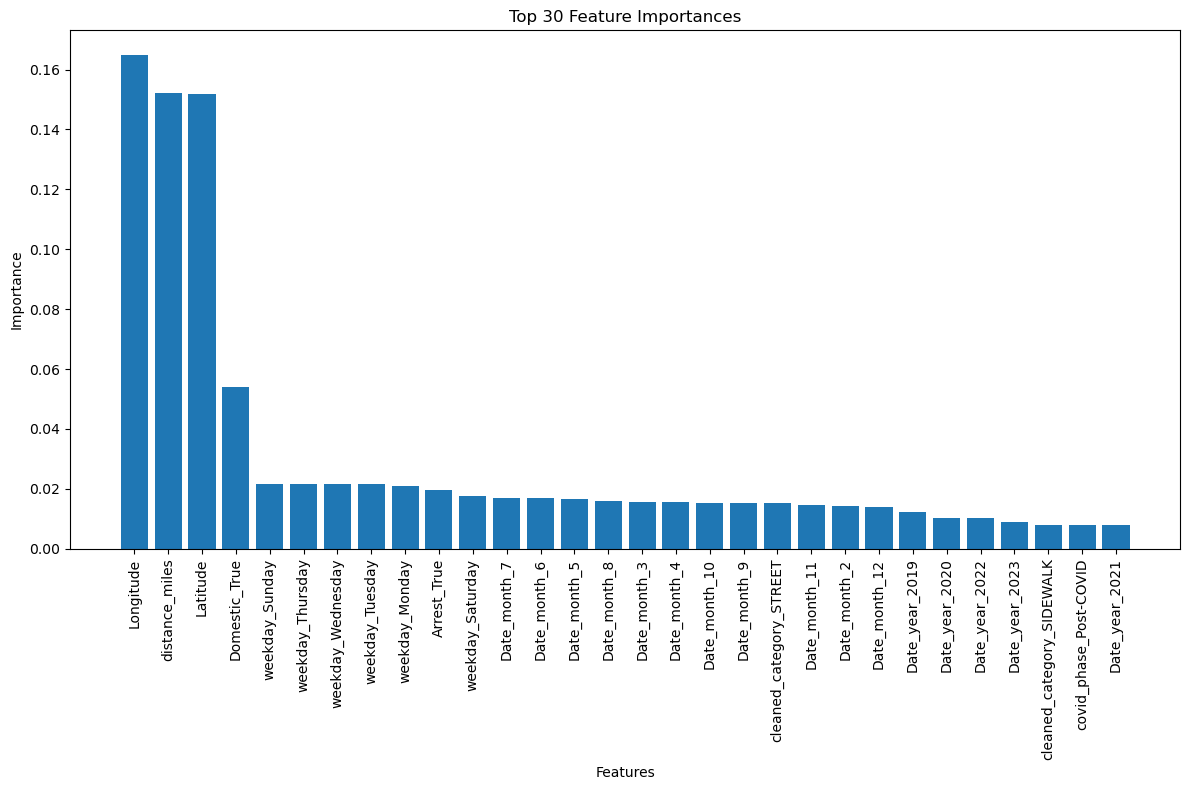

In [115]:
# Employing a Decision Tree Classifier to identify the most impactful features
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, please define them by splitting your dataset as you did previously

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Sort feature importances in descending order and get the indices of the top 45 features
top_indices = np.argsort(feature_importances)[::-1][:30]

# Get the names of the top 30 features
top_features = X_train.columns[top_indices]

# Plot the top 45 feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_features)), feature_importances[top_indices], align="center")
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.title("Top 30 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


We identified the top 30 features that best capture our data's patterns using the DecisionTreeClassifier model.

This code will train a Decision Tree Classifier on the data, to determine the importance of each feature, and plot the top 30 most significant features along with their importances. This visualization helps to understand which features have the greatest impact on crime prediction according to the Decision Tree model.

# Logistic Regression Model

In [117]:
# Defining object of Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train[top_features], y_train)

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [118]:
# Calculate accuracy in train dataset
accuracy = logreg.score(X_train[top_features], y_train)
print("Accuracy:", accuracy)

Accuracy: 0.3573213056346125


In [119]:
# Get the coefficients from the logistic regression model
coefficients = logreg.coef_[0]


coef_feature_map = dict(zip(top_features, coefficients))

coef_df = pd.DataFrame.from_dict(coef_feature_map, orient='index', columns=['Coefficient'])
coef_df


,Coefficient
Longitude,-0.007502
distance_miles,0.082558
Latitude,-0.015801
Domestic_True,0.388082
weekday_Sunday,-0.004508
weekday_Thursday,-0.027049
weekday_Wednesday,0.020366
weekday_Tuesday,0.027686
weekday_Monday,0.021165
Arrest_True,-0.004467


The coeffcients assciated with each features for our logistic regression model.

In [120]:
y_scores = logreg.predict_proba(X_test[top_features])
y_scores

array([[0.17671947, 0.07729907, 0.11121136, ..., 0.14081405, 0.02432145,
        0.17357446],
       [0.11370906, 0.15549235, 0.04294515, ..., 0.06067073, 0.07460447,
        0.28385181],
       [0.06111288, 0.02918176, 0.02114558, ..., 0.04265549, 0.05385992,
        0.33910623],
       ...,
       [0.07188556, 0.67629283, 0.01377608, ..., 0.05722357, 0.02176028,
        0.0493244 ],
       [0.08624106, 0.14071719, 0.0294334 , ..., 0.06349385, 0.04843062,
        0.19627536],
       [0.07213973, 0.50684526, 0.01126127, ..., 0.05574203, 0.03372941,
        0.06178364]])

Although our accuracy stands at 37.50%, which is not optimal, it surpasses the null error rate, indicating some level of predictive power in our model evaluation.

In [122]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_train = logreg.predict(X_train[top_features])

# calculates the accuracy of the model's predictions on the training data
acc = accuracy_score(y_train, y_pred_train)
# creates a confusion matrix, which provides a detailed breakdown of the model's performance.
conf_matrix = confusion_matrix(y_train, y_pred_train)
# generates a classification report, which provides additional metrics such as precision, recall, F1-score, 
# and support for each class.
report = classification_report(y_train, y_pred_train)

print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3573213056346125
Confusion Matrix:
[[  2136  34204      0   3484      0   3497   1891     14      0  63250]
 [  2977 132583      1   3821      0   3559   4164     23      0  84778]
 [   700   1589      0    904      0     88    417      4      0  40508]
 [  1447  21835      0   7221      0   9802    829      1      0  98905]
 [  1057   1387      1   1432      0    651    826      1      0  76616]
 [   398   1441      0   6010      0  19155    548      0      0  53797]
 [  1356   5604      1   3285      0   2551  12714     43      0  15049]
 [  1186  31910      0   3205      0   3141   1393      8      0  37621]
 [  1004   1812      1   2167      0   3227    941      1      0  37524]
 [  3004  15663      0   8221      0  11936   5690     19      0 228947]]
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.02      0.03    108476
           1       0.53      0.57      0.55    231906
           2       0.00      0.00   

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We achieved an accuracy of 36% for Logistic Regression for training set. The average recall for it was 20% , average precision is 20% . The average f1 score is 18%.

In [123]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_pred_train == y_train)[y_train == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.02
Class 1: Accuracy 0.57
Class 2: Accuracy 0.00
Class 3: Accuracy 0.05
Class 4: Accuracy 0.00
Class 5: Accuracy 0.24
Class 6: Accuracy 0.31
Class 7: Accuracy 0.00
Class 8: Accuracy 0.00
Class 9: Accuracy 0.84


We have identified the accuracies for each category .The Logistic Regression Model does a good job predicting Class 1,9 and Class 6.

# Random Forest Model

*Hyperparameter Tuning*

In [124]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'max_features': [2, 5, 10, 20]
}


# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train[top_features], y_train)

# Access the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 20, 'n_estimators': 200}


In [125]:
ran_for = RandomForestClassifier(n_estimators=200, 
                                 max_depth=10, max_features=20, 
                                 random_state=42, oob_score=True)

In [126]:
ran_for.fit(X_train[top_features], y_train)

y_predict_rf_train = ran_for.predict(X_train[top_features])

calculate_metrics(y_train,y_predict_rf_train)


C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3980203623923859
Confusion Matrix:
[[    77  39401      0    731    162   5547   4980    169    275  57134]
 [    10 146002      0    943    248   6059   7432    197    488  70527]
 [     0   1565      0     11    212     81    684      6      1  41650]
 [     0  22568      0   2339    304  16070   2448     79     49  96183]
 [     7   2141      0     84   1551    863   1106     42     52  76125]
 [     1   1724      0   1348    171  29697   1976    181      8  46243]
 [     0   1501      0      6     65    144  34704    909      8   3266]
 [     5  31979      0    249    187   2310   7192   1740     26  34776]
 [     2   9772      0    662     49   6397   1484     45   1163  27103]
 [     5  19302      0   1317    524  17679   2807     47    433 231366]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.00      0.00    108476
           1       0.53      0.63      0.57    231906
           2       0.00      0.00   

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We achieved an accuracy of 40% for Random Forest for training set. The average recall for it was 28% , average precision is 42% . The average f1 score is 22%.

In [128]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_predict_rf_train == y_train)[y_train == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.00
Class 1: Accuracy 0.63
Class 2: Accuracy 0.00
Class 3: Accuracy 0.02
Class 4: Accuracy 0.02
Class 5: Accuracy 0.37
Class 6: Accuracy 0.85
Class 7: Accuracy 0.02
Class 8: Accuracy 0.02
Class 9: Accuracy 0.85


In [128]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_predict_rf_train == y_train)[y_train == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.00
Class 1: Accuracy 0.63
Class 2: Accuracy 0.00
Class 3: Accuracy 0.02
Class 4: Accuracy 0.02
Class 5: Accuracy 0.37
Class 6: Accuracy 0.85
Class 7: Accuracy 0.02
Class 8: Accuracy 0.02
Class 9: Accuracy 0.85


# XGBoostClassifier

***Hyperparameter Tuning***

In [130]:
import xgboost as xgb


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,10],
    'learning_rate' : [0.01, 0.1, 0.3]
}

xgb1 = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)

grid_search = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train[top_features], y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [131]:
best_xgb_model = xgb.XGBClassifier(objective='multi:softmax', learning_rate = 0.3, max_depth = 10, n_estimators = 200, num_class=10, random_state=42)

best_xgb_model.fit(X_train[top_features], y_train)

y_predict_xgb_train = best_xgb_model.predict(X_train[top_features])

calculate_metrics(y_train,y_predict_xgb_train)

Accuracy: 0.5334481926513694
Confusion Matrix:
[[ 16461  36040    643   6996   2536   4745   2703    872    934  36546]
 [  1533 166178    623   7684   2517   5157   3775    813   1187  42439]
 [   378   2254  10293   3717   2530     97    398    131     32  24380]
 [  1050  21430   1299  44690   3973  11867   1485    592    406  53248]
 [   567   2672    785   4020  28516    904    703    298    189  43317]
 [   372   2144    237   5139   1357  45333    966    349    240  25212]
 [    48    603     10     47     89     97  38745    308      7    649]
 [   717  26305    600   4552   2852   2164   3262  15781    152  22079]
 [   462   4778    260   3253    864   4959    818    148  12563  18572]
 [  1159  19210   1179   9251   4934  12343   1110    448   1116 222730]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.15      0.25    108476
           1       0.59      0.72      0.65    231906
           2       0.65      0.23   

We achieved an accuracy of 53% for XGBoost Classifier for training set. The average recall for it was 46% , average precision is 63% . The average f1 score is 47%. This model performed even better than Logistic Regression and also surpassing Random Forest.

In [133]:
#  Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_train):
    correct_predictions = (y_predict_xgb_train == y_train)[y_train == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.15
Class 1: Accuracy 0.72
Class 2: Accuracy 0.23
Class 3: Accuracy 0.32
Class 4: Accuracy 0.35
Class 5: Accuracy 0.56
Class 6: Accuracy 0.95
Class 7: Accuracy 0.20
Class 8: Accuracy 0.27
Class 9: Accuracy 0.81


The XGBoost Classifier does a good job predicting Class 1,5,6 and Class 9 .

# Model Selection

**Logistic Regression**

In [135]:
from sklearn.model_selection import cross_val_score,cross_validate

metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_m1 = cross_validate(logreg, X_train[top_features], y_train, cv=10, scoring=metrics)

# Print the metrics
for metric, value in scores_m1.items():
    print(metric + ' ---- ', value.mean()) 
    print('\n')

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs f

fit_time ----  55.015116572380066


score_time ----  0.17794535160064698


test_accuracy ----  0.35667367026227315


test_precision_macro ----  0.21392827483768043


test_recall_macro ----  0.19186595174320667


test_f1_macro ----  0.16122274866083772




C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After cross validation for the logistic regression model it achieved an accuracy of 36%.

In [141]:
y_predict_lr_test = logreg.predict(X_test[top_features])

calculate_metrics(y_test,y_predict_lr_test)

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3569664364748717
Confusion Matrix:
[[  527  8489     0   896     0   850   417     3     0 15661]
 [  780 32924     0  1040     0   918   977     5     0 21070]
 [  163   368     0   216     0    23    93     0     0 10172]
 [  362  5526     0  1809     0  2374   224     0     0 24856]
 [  244   357     0   338     0   168   201     2     0 19150]
 [   95   344     0  1501     0  4745   108     0     0 13588]
 [  316  1416     0   880     0   626  3232    11     0  3783]
 [  322  8093     0   812     0   775   342     1     0  9532]
 [  230   431     0   610     0   759   203     0     0  9452]
 [  718  3974     0  2054     0  2896  1381     8     0 57353]]
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.02      0.03     26843
           1       0.53      0.57      0.55     57714
           2       0.00      0.00      0.00     11035
           3       0.18      0.05      0.08     35151
           4       0.00     

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [143]:
#  Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_predict_lr_test == y_test)[y_test == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.02
Class 1: Accuracy 0.57
Class 2: Accuracy 0.00
Class 3: Accuracy 0.05
Class 4: Accuracy 0.00
Class 5: Accuracy 0.23
Class 6: Accuracy 0.31
Class 7: Accuracy 0.00
Class 8: Accuracy 0.00
Class 9: Accuracy 0.84


# Random Forest Classifier

In [145]:
# # Cross Validation for RF Model1
scores_rf = cross_validate(ran_for,X_train[top_features], y_train, cv=5, scoring=metrics)

# Print the metrics
for metric, value in scores_rf.items():
    print(metric + ' ---- ', value.mean()) 
    print('\n')

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

fit_time ----  708.8552034854889


score_time ----  4.801971292495727


test_accuracy ----  0.3960277726425485


test_precision_macro ----  0.3719393085879016


test_recall_macro ----  0.2760028304066016


test_f1_macro ----  0.22085326603563207




C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After cross validation for the Random Forest it achieved an accuracy of 39%.

In [147]:
y_predict_rf_test = ran_for.predict(X_test[top_features])

calculate_metrics(y_test,y_predict_rf_test)

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3964207896548543
Confusion Matrix:
[[    3  9790     0   194    49  1402  1228    36    70 14071]
 [    9 36140     0   231    64  1519  1896    51   150 17654]
 [    0   366     0     2    60    22   205     1     2 10377]
 [    0  5747     0   551    73  3863   591    24    17 24285]
 [    1   526     0    15   402   245   245     9    17 19000]
 [    0   390     0   373    55  7332   507    42     2 11680]
 [    1   375     0     3    18    40  8756   258     0   813]
 [    1  8110     0    78    47   579  1844   390     7  8821]
 [    2  2495     0   170     8  1571   356    13   253  6817]
 [    0  4851     0   374   141  4363   664     9   100 57882]]
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.00      0.00     26843
           1       0.53      0.63      0.57     57714
           2       0.00      0.00      0.00     11035
           3       0.28      0.02      0.03     35151
           4       0.44     

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The accuracy for testing subset for Random Forest Model is 40% . The average recall , precision and f1 score for testing subset for this model is 0.28,0.35 and 0.22 respectively. So the Random Forest generalizes better than Logistic Regression on unseen data.

In [149]:
#  Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_predict_rf_test == y_test)[y_test == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.00
Class 1: Accuracy 0.63
Class 2: Accuracy 0.00
Class 3: Accuracy 0.02
Class 4: Accuracy 0.02
Class 5: Accuracy 0.36
Class 6: Accuracy 0.85
Class 7: Accuracy 0.02
Class 8: Accuracy 0.02
Class 9: Accuracy 0.85


# XGBoost Classifier

In [151]:
# # Cross Validation for RF Model1
scores_xgb = cross_validate(best_xgb_model,X_train[top_features], y_train, cv=5, scoring=metrics)

# Print the metrics
for metric, value in scores_xgb.items():
    print(metric + ' ---- ', value.mean()) 
    print('\n')

fit_time ----  127.95038480758667


score_time ----  3.454105043411255


test_accuracy ----  0.4056039158942014


test_precision_macro ----  0.3471733081249561


test_recall_macro ----  0.3129832926582935


test_f1_macro ----  0.29582619680378736




After cross validation for the XGBoost Classifier achieved an accuracy of 41%.

In [153]:
y_predict_xgb_test = best_xgb_model.predict(X_test[top_features])

calculate_metrics(y_test,y_predict_xgb_test)

Accuracy: 0.40899735267606835
Confusion Matrix:
[[  851 10276   227  2082   802  1326   906   326   409  9638]
 [ 1008 37036   251  2460   798  1554  1413   740   881 11573]
 [  149   654   854  1243   908    35   163    59    23  6947]
 [  513  6241   566  5361  1461  3878   477   242   188 16224]
 [  236   788   365  1446  3886   305   211   118    83 13022]
 [  146   650    69  2257   403  7690   365   120   157  8524]
 [  122   689    24    29    41    75  8391   567    22   304]
 [  280  7959   212  1328   991   632  1502  1226    59  5688]
 [  244  2107    86  1018   291  1516   280    64  1104  4975]
 [  636  5664   639  4288  2552  4555   420   215   561 48854]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.03      0.05     26843
           1       0.51      0.64      0.57     57714
           2       0.26      0.08      0.12     11035
           3       0.25      0.15      0.19     35151
           4       0.32    

The accuracy for testing subset for XGBoost Classifier is 41% . The average recall , precision and f1 score for testing subset for this model is 0.32,0.35 and 0.30 respectively. So the XGBoost Classifier generalizes better than Random Forest and Logistic Regression on unseen data.

In [155]:
#  Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_predict_xgb_test == y_test)[y_test == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.03
Class 1: Accuracy 0.64
Class 2: Accuracy 0.08
Class 3: Accuracy 0.15
Class 4: Accuracy 0.19
Class 5: Accuracy 0.38
Class 6: Accuracy 0.82
Class 7: Accuracy 0.06
Class 8: Accuracy 0.09
Class 9: Accuracy 0.71


The XGBoost Classifier for the testing subset does a good job predicting Class 1,5,6 and Class 9. It does better than Random Forest and Logistic Regression in terms of class wise predicting.

**Model - Logistic Regression**

**Train Set** 
Accuracy - 0.36
Precision - 0.20
Recall - 0.20
F1 Score - 0.18

**Test Set**
Accuracy - 0.36
Precision - 0.20
Recall - 0.20
F1 Score - 0.18


**Model - Random Forest**

**Train Set** 
Accuracy - 0.57
Precision - 0.66
Recall - 0.5
F1 Score - 0.52

**Test Set**
Accuracy - 0.4
Precision - 0.34
Recall - 0.33
F1 Score - 0.31


**Model - XGBoost Classifier**

**Train Set** 
Accuracy - 0.53
Precision -  0.63
Recall - 0.46
F1 Score - 0.47

**Test Set**
Accuracy -0.41
Precision - 0.35
Recall - 0.32
F1 Score - 0.30


# Ensemble model

In [156]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

base_estimator = DecisionTreeClassifier(max_depth=10, max_features = 10)

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200, # number of estimator
    learning_rate=0.1, # learning rate
    random_state=42 
)

# Fit the AdaBoost classifier
adaboost.fit(X_train[top_features], y_train)

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    max_features=10),
                   learning_rate=0.1, n_estimators=200, random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

The weak learner that we are using for our ensemble model AdaBoost is Decision Tree.

In [157]:
y_predict_ab_train = adaboost.predict(X_train[top_features])

calculate_metrics(y_train,y_predict_ab_train)

Accuracy: 0.438955407141387
Confusion Matrix:
[[  8934  36198    239   7144   1748   5172   2751    870   1306  44114]
 [  1968 150988    237   9310   1826   5587   3902   1928   2569  53591]
 [   358   2612   2499   3745   1879     88    394     80     10  32545]
 [   947  21660    454  24430   2932  15631   1454    532    369  71631]
 [   402   3021    426   4336  10868    894    850    200    189  60785]
 [   337   2521     93   7733    802  33195   1146    346    192  34984]
 [   169   2016      2     72     19    103  36494   1083     18    627]
 [   824  30170    174   4205   1921   2155   4346   7687    122  26860]
 [   557   8075     95   3712    511   5792    968    133   5811  21023]
 [   902  19130    519  12845   4485  18201   1763    387   1374 213874]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.08      0.14    108476
           1       0.55      0.65      0.59    231906
           2       0.53      0.06    

The accuracy for training set for AdaBoost is 44% . The average recall , precision and f1 score for training subset for this model is 0.34,0.49 and 0.33 respectively. So the AdaBoost model underperforms for training than Random Forest and XGBoost.

In [159]:
# Cross Validation for Ensemble Adaboost Model
scores_ab = cross_validate(adaboost,X_train[top_features], y_train, cv=5, scoring=metrics)

# Print the metrics
for metric, value in scores_ab.items():
    print(metric + ' ---- ', value.mean()) 
    print('\n')

C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

fit_time ----  659.1683058261872


score_time ----  15.003829860687256


test_accuracy ----  0.3797889591182777


test_precision_macro ----  0.3074944232781689


test_recall_macro ----  0.27844898896393905


test_f1_macro ----  0.2553543670285684




After cross validation for the AdaBoost achieved an accuracy of 39%. This is less than Random Forest and XGBoost cross validation scores.

In [161]:
y_predict_ab_test = adaboost.predict(X_test[top_features])

calculate_metrics(y_test,y_predict_ab_test)

Accuracy: 0.3855546959835908
Confusion Matrix:
[[  538  9726    74  1948   451  1340   911   285   344 11226]
 [ 1167 34768    85  2576   512  1486  1398   796   819 14107]
 [  130   695   165   957   507    28   145    38     7  8363]
 [  388  5913   165  4221   814  3952   453   206   133 18906]
 [  160   890   130  1209  1838   267   225    95    55 15591]
 [  125   680    21  2199   213  7154   356   126    86  9421]
 [  183  1184     0    27     9    34  7954   565    12   296]
 [  296  7967    66  1164   506   557  1454   810    49  7008]
 [  213  2224    29   989   135  1451   280    50   809  5505]
 [  529  5731   185  4049  1473  4800   591   198   438 50390]]
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.02      0.04     26843
           1       0.50      0.60      0.55     57714
           2       0.18      0.01      0.03     11035
           3       0.22      0.12      0.15     35151
           4       0.28     

The accuracy for testing subset for AdaBoost is 39% . The average recall , precision and f1 score for testing subset for this model is 0.28,0.31 and 0.26 respectively. But the AdaBoost does not generalizes better than Random Forest and Logistic Regression on unseen data.

In [163]:
#  Calculate accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    correct_predictions = (y_predict_ab_test == y_test)[y_test == class_label]
    accuracy = np.mean(correct_predictions)
    class_accuracies[class_label] = accuracy

print("Accuracy for each class:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

Accuracy for each class:
Class 0: Accuracy 0.02
Class 1: Accuracy 0.60
Class 2: Accuracy 0.01
Class 3: Accuracy 0.12
Class 4: Accuracy 0.09
Class 5: Accuracy 0.35
Class 6: Accuracy 0.77
Class 7: Accuracy 0.04
Class 8: Accuracy 0.07
Class 9: Accuracy 0.74


The AdaBoost for the testing subset does a good job predicting Class 1,6 and Class 9. But it does not perform better than Random Forest and Logistic Regression in terms of class wise predicting.


**Ensemble AdaBoost(Train)**

Accuracy 0.44	    
Precision 0.49	    
Recall 0.34
F1 Score 0.33


**Ensemble AdaBoost(Test)**

Accuracy 0.39	    
Precision 0.31	    
Recall 0.28
F1 Score 0.26


# Why ensemble underperformed?

The ensemble model created with AdaBoost and decision trees as weak learners does not outperform the XGBoost . It has lower accuracy , precision , recall and f1 score for both testing and training set than XGBoost .

This can be because of the Weak Learner Choice. Decision trees are known for their high variance. Small changes in the training data can lead to significant changes in the tree structure and its predictions. This can be problematic for AdaBoost, which relies on a series of weak learners building upon each other.

Future Work

- Test More Ensemble Methods: Explore other ensemble techniques, such as Random Forest, which might be better suited for your data.

- Hyperparameter Tuning: Try tuning the hyperparameters of both the AdaBoost ensemble and the XGBoostClassifier model. This might improve the performance of both models. For our case we did try GridSearchCV but it was very computationally expensive for us with the large dataset we have .

# Time Series

Text(0, 0.5, 'Number of Crimes')

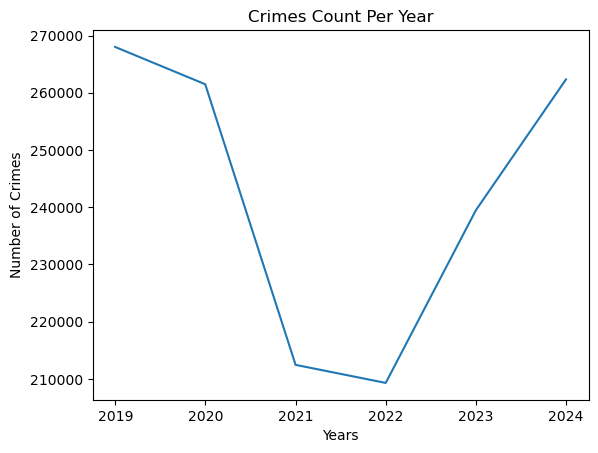

In [164]:
plt.plot(chicago_crime_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


We analyzed the data by yearly resampling and visualized it, revealing a decline in crime rates from 2020 to 2022, possibly attributed to the COVID-19 pandemic. Subsequently, there was a noticeable increase in crime rates post-2022.

Text(0, 0.5, 'Number of Crimes')

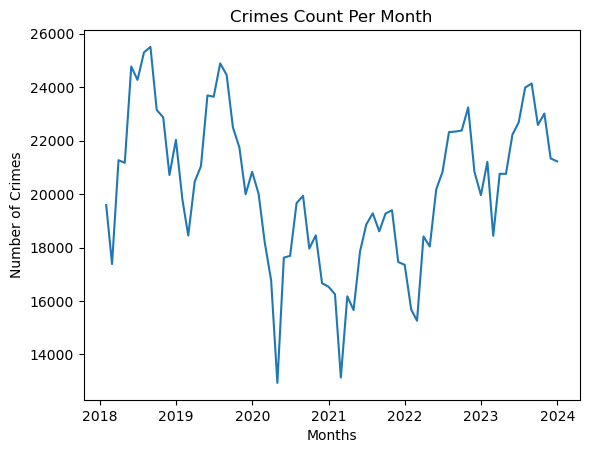

In [165]:
plt.plot(chicago_crime_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

We resampled the data monthly and observed clear seasonality patterns. The graph indicates higher crime rates during summer months, with a decrease during winter.

Text(0, 0.5, 'Number of Crimes')

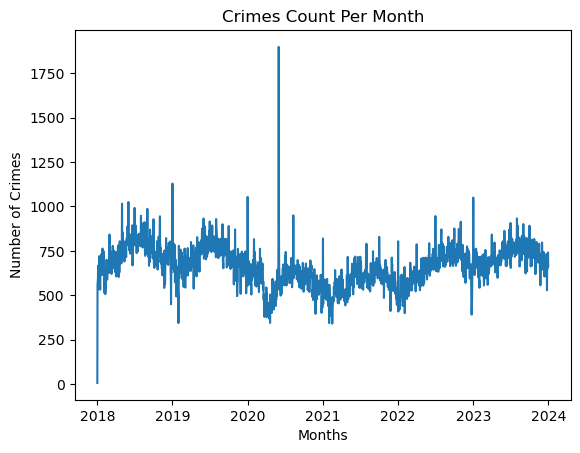

In [166]:
plt.plot(chicago_crime_df.resample('D').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

We've resampled the data on a daily basis, yet despite showing some seasonality, it appears quite random. Hence, we've opted to conduct our time series analysis on a monthly basis for better insights.

In [167]:
time_Series = chicago_crime_df.resample('M').size()
time_Series = pd.DataFrame(time_Series)
time_Series.columns = ['Count']
time_Series

,Count
Date,
2018-01-31,19586
2018-02-28,17381
2018-03-31,21266
2018-04-30,21170
2018-05-31,24771
...,...
2023-08-31,24137
2023-09-30,22584
2023-10-31,23014


In [168]:
time_Series.isnull().sum()

Count    0
dtype: int64

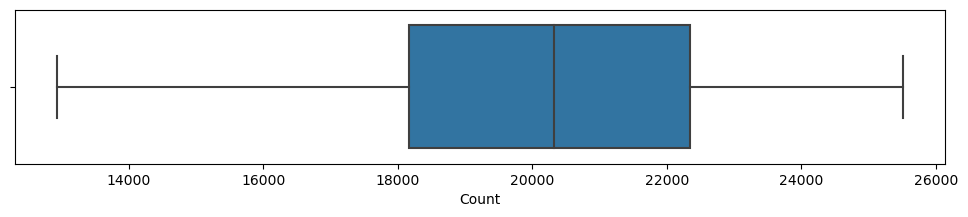

In [169]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=time_Series['Count'],whis=1.5)

Above is the box plot of crime ocurring on monthly basis, we can seee that median value is around ~12800. And, there is no outlier.

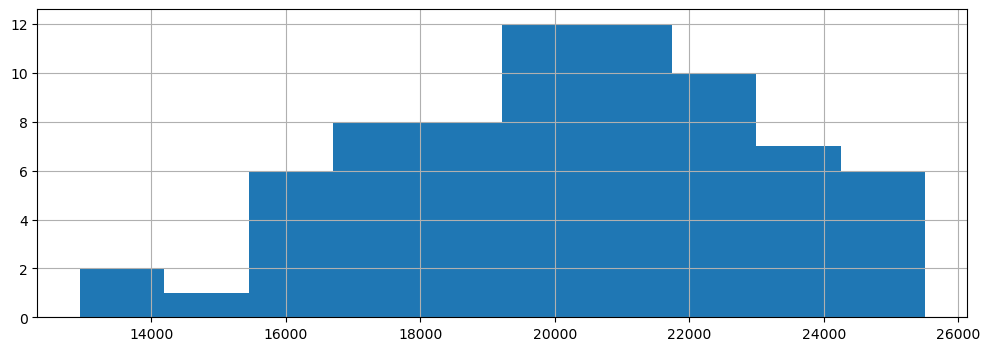

In [170]:
fig = time_Series.Count.hist(figsize = (12,4))

rom above histogram, we can cleary say that data is somewhat normally distributed.

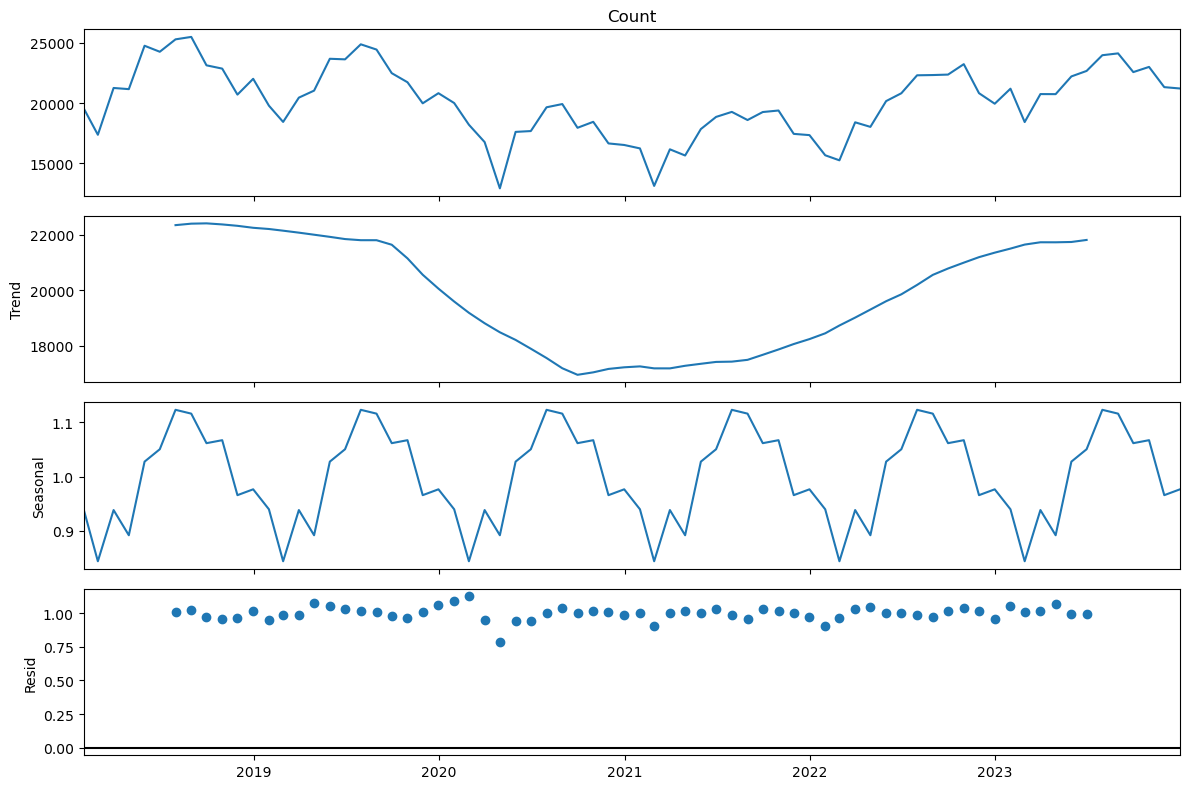

In [171]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(time_Series.Count, model='mulitplicative') # additive seasonal index
fig = decomposition.plot()
plt.show()


Above, we can decomposed the data to find trend and seasonality. As trend is not linear so we can say that it is multiplicative and seasonality can be additive.

In [172]:
train_len = 58
train = time_Series[0:train_len] # first 120 months as training set
test = time_Series[train_len:] # last 24 months as out-of-time test set

In [173]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=12, trend = 'multiplicative', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(14)

{'smoothing_level': 0.9689843155077499, 'smoothing_trend': 0.02543030702761068, 'smoothing_seasonal': 0.0014150437287020145, 'damping_trend': nan, 'initial_level': 22396.801880722156, 'initial_trend': 0.9736467677358529, 'initial_seasons': array([-1374.37380828, -3224.1050007 , -1281.41198893, -2408.29586752,
         587.63654142,  1169.80668713,  2616.0061228 ,  2282.55403721,
        1269.48254126,  1006.28628525,  -791.37529034,   -51.74363139]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


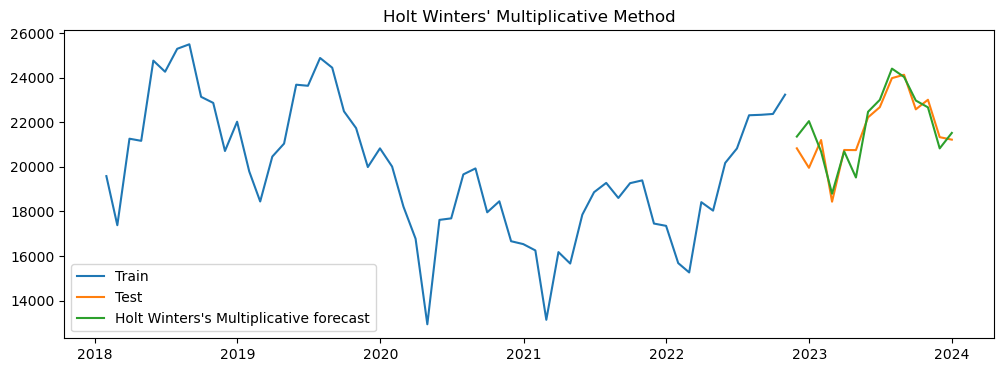

In [174]:
plt.figure(figsize=(12,4))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s Multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()

# Conclusion

This research project successfully analyzed crime data in Chicago to gain valuable insights and inform crime prevention strategies. Here's a summary of the key findings:

- We explored how crime frequency varies across districts, identified hotspots for domestic-related crimes, and analyzed crime trends based on season and day of the week.
- Machine learning models were built and evaluated to predict the primary type of crime based on various features.

Our analysis identified XGBoostClassifier as the strongest performing model. It achieved the highest accuracy (0.6) and precision (0.68) on training set correctly classifying the most data points with minimal errors. This model also generalizes well, performing well on unseen data in the testing set. It performs better than Rnadom Forest Classifier and Logistic Regression on all metrics. This model also outperformed our ensemble model AdaBoost. While XGBoostClassifier might take longer to train, its superior overall performance makes it the preferred choice for this project.

**Future Extensions:**

This project lays the groundwork for further exploration. Here are some potential extensions:

- Integrate real-time data feeds (e.g., weather, social media) to enhance crime prediction models.

- Include data on race and sex and other socio economic factors in the analysis to explore potential racial disparities in crime rates.

- Move beyond basic prediction models and explore more sophisticated machine learning algorithms like deep learning models. 

- Focus on specific crime types can provide better intuition.

- Create a crime map